# Exercice 1 - Visualisation et filtrage

## 1.1 Recherche d'un enregistrement et affichage de celui-ci 

### Question 1

Dans cette première partie, nous cherchons à trouver un enregistrement qui contient à la fois un signal ABP et un signal PLETH (qui correspond à PPG). En cherchant sur la base de données MIMIC indiquée sur la fiche du TP, nous avons trouvé l'enregistrement p028897/3173069_0001 qui appartient à la base de données p02/p028897.

**Nota bene :** Les librairies nécessaires sont déjà installées depuis le déroulement du TP1 donc nous n'avons pas besoin de procéder à nouveau à l'installation des librairies wfdb et matplotlib pour cette seance de laboratoire.

In [3]:
import wfdb

record_path = "/Users/vasilisskarleas/Library/Mobile Documents/com~apple~CloudDocs/Documents/ETS University/GTS880/Lab/Lab_2/signals/3173069_0001"
header_1 = wfdb.rdheader(record_path)
record_1 = wfdb.rdrecord(record_path) 

print(record_1.sig_name)

['II', 'MCL', 'AVR', 'RESP', 'PAP', 'CVP', 'ABP', 'PLETH']


On peut observer que les noms des signaux présents dans cet enregistrement sont ['II', 'MCL', 'AVR', 'RESP', 'PAP', 'CVP', 'ABP', 'PLETH'] qui correspondent bien aux signaux que nous avons visualisés en ligne comme vous pouvez le remarquer ci-dessous.

![image](images/pleth_1.png)

Maintenant nous procédons avec le tracé de tous les canaux de l'enregistrement en question.

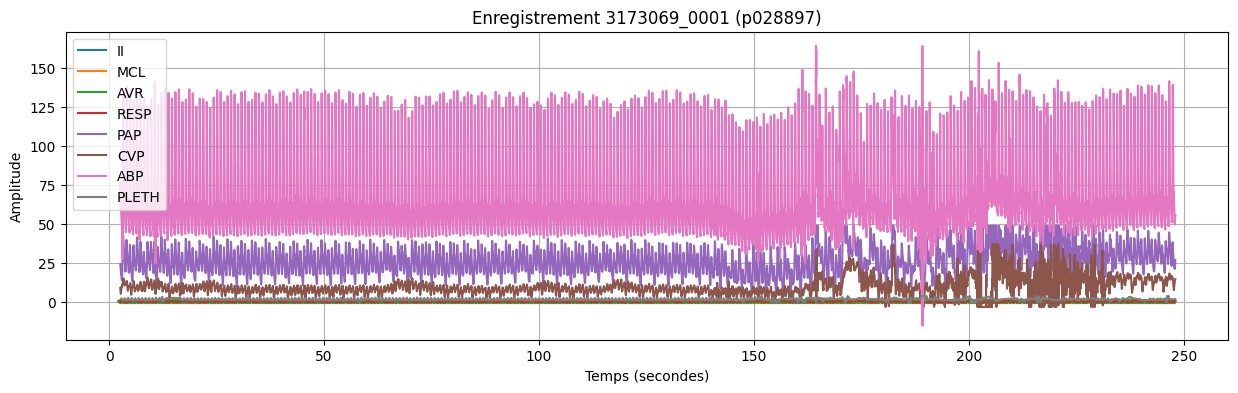

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Vecteur du temp
temps_1 = np.arange(len(record_1.p_signal)) / record_1.fs

plt.figure(figsize=(15, 4))
plt.xlabel('Temps (secondes)')
plt.ylabel('Amplitude')
plt.title(f'Enregistrement 3173069_0001 (p028897)')
plt.grid(True)

# Les differents signaux avec leurs noms 
for i, name in enumerate(record_1.sig_name):
        plt.plot(temps_1, record_1.p_signal[:, i], label=name)
plt.legend()
plt.show()

### Question 2

Ici nous allons nous focaliser sur l'enregistrement p04/p046223/3729975_0001. Voici l'implémentation pour le tracé de cet enregistrement :

In [5]:
record_path = "/Users/vasilisskarleas/Library/Mobile Documents/com~apple~CloudDocs/Documents/ETS University/GTS880/Lab/Lab_2/signals/3729975_0001"
header_2 = wfdb.rdheader(record_path)
record_2 = wfdb.rdrecord(record_path) 

print(record_2.sig_name)

['PLETH', 'RESP', 'ABP', 'II', 'V', 'AVR']


Sur cet enregistrement, on va observer les signaux suivants :

* **PLETH :** Correspond au signal PPG qui représente les variations du volume sanguin.
* **RESP :** Correspond au signal de respiration qui reflète les mouvements respiratoires du patient. Selon le cours, il pourrait être mesuré en utilisant une ceinture de respiration placée sur la poitrine.
* **ABP :** Correspond au signal de la pression artérielle invasive, qui est mesuré en utilisant un cathéter intra-artériel.
* **II :** Correspond à la différence de potentiel entre le bras droit et la jambe gauche (vue en cours du signal ECG). C'est une vue caractéristique de l'activité électrique du cœur qu'on utilise pour surveiller le rythme cardiaque, donnée par la formule *II = LL-RA*.
* **V :** Correspond aux six dernières dérivations (dérivations précordiales) qui sont formées par la différence de tension entre les dérivations précordiales et la borne centrale de Wilson donnée par la formule *Vw = (RA+LA+LL)/3*.
* **AVR :** Il s'agit d'une dérivation augmentée (composant du signal ECG) qui mesure le voltage sur le bras droit par rapport à une référence moyenne des électrodes sur le bras gauche et la jambe gauche. Elle est donnée par la formule *aVR=3(RA-Vw)/2* selon notre cour.

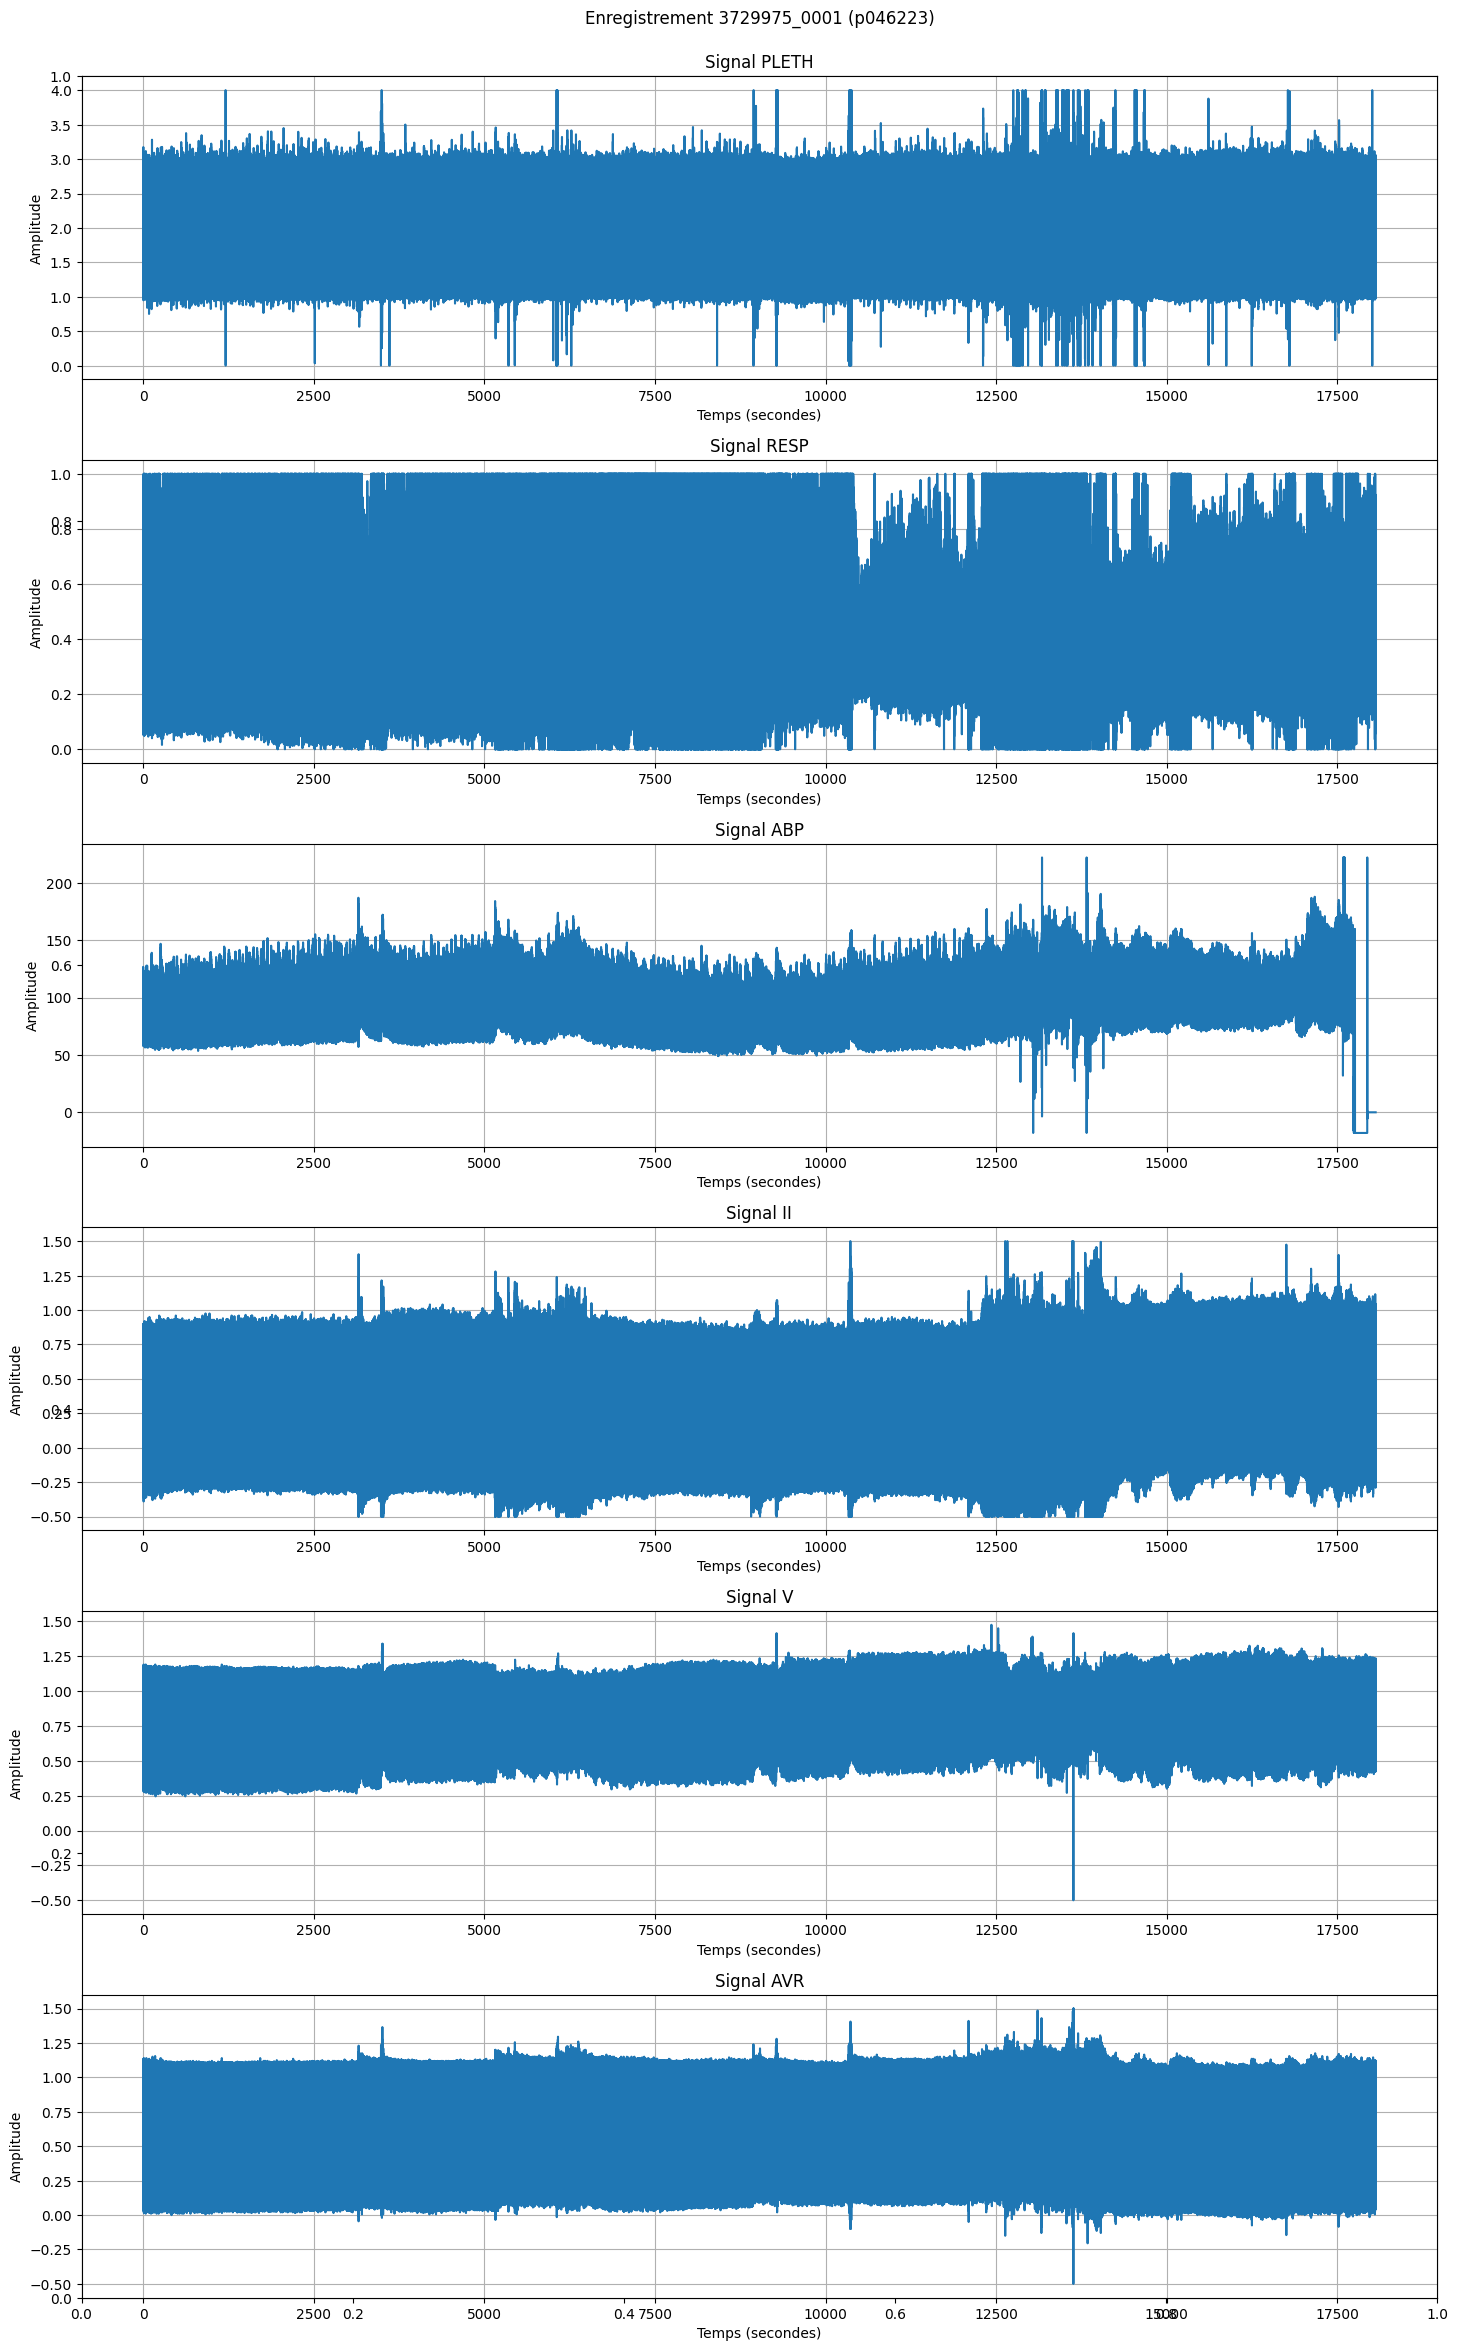

Frequence d'échantillonnage: 125 Hz


In [6]:
# Vecteur temps
temps_2 = np.arange(len(record_2.p_signal)) / record_2.fs # en secondes

plt.figure(figsize=(15, 4 * len(record_2.sig_name)))
plt.title(f'Enregistrement 3729975_0001 (p046223)', y=1.02)

for i in range(len(record_2.sig_name)):
    plt.subplot(len(record_2.sig_name), 1, i + 1)
    plt.xlabel('Temps (secondes)')
    plt.ylabel('Amplitude')
    plt.xlabel('Temps (secondes)')
    plt.title(f'Signal {record_2.sig_name[i]}')
    plt.grid(True)
    plt.plot(temps_2, record_2.p_signal[:, i])


plt.tight_layout()
plt.show()

print(f"Frequence d'échantillonnage: {record_2.fs} Hz")

**Nota bene :** Nous utilisons la fonction tight_layout() pour ajuster automatiquement nos sous-plots.

### Question 3

Comme vu au TP1, pour afficher les morceaux des signaux pendant 10 secondes à partir du temps de départ = 30 s, ça veut dire de 30 secondes à 40 secondes. Pour cela on sait que la fréquence d'échantillonnage est 125 Hz, donc on sait qu'il existe 125 points par seconde. Ainsi nous cherchons le point de début à 30 secondes qui est 30 × 125 = 3750, jusqu'à 40 × 125 = 5000. Donc pour l'intervalle de 30 secondes à 40 secondes, on se focalise sur l'intervalle des points de données entre 3750 et 5000.

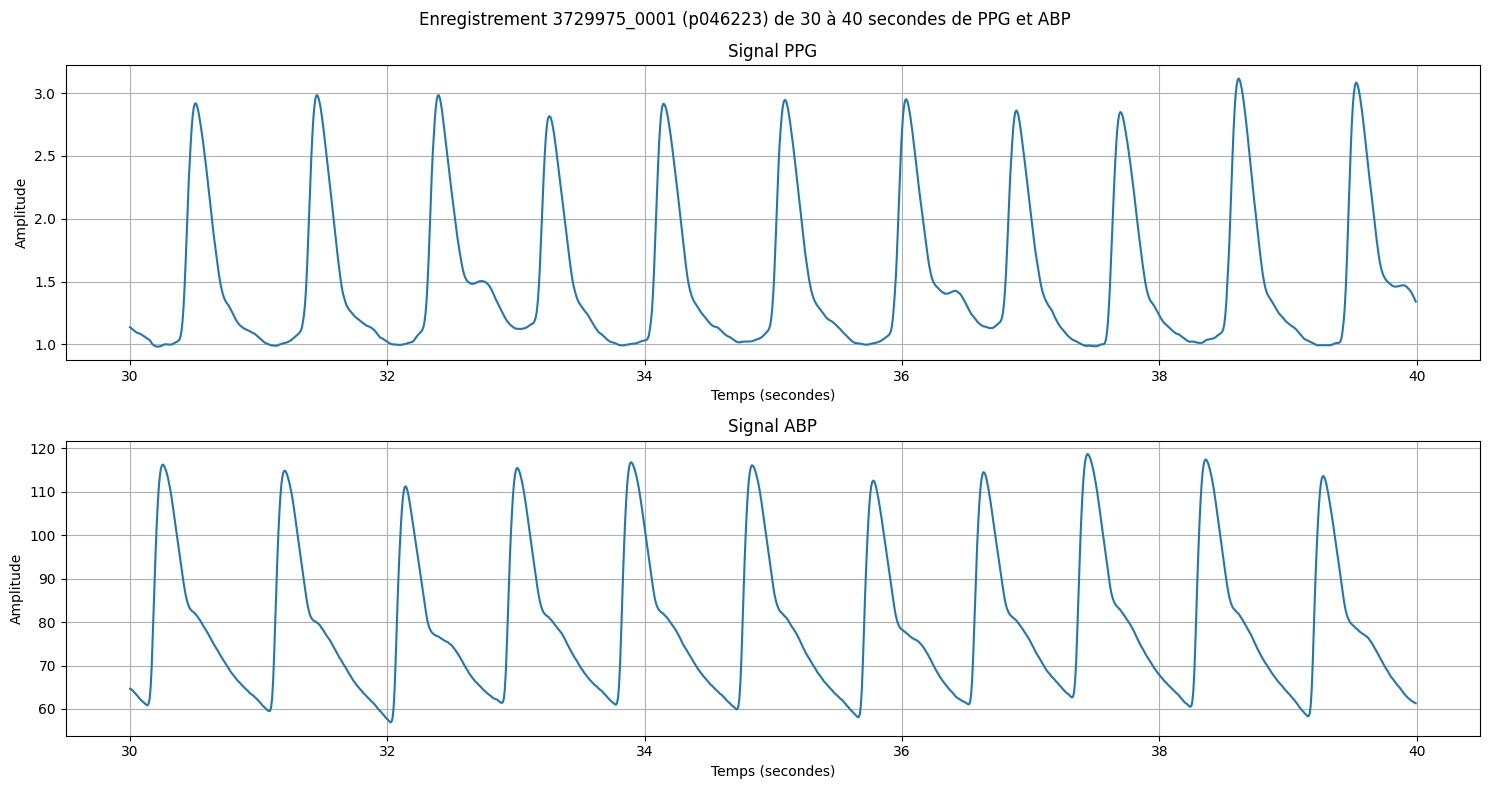

In [7]:
debut = 30 * record_2.fs
fin = 40 * record_2.fs
 
# On trouve les indices pour PLETH (PPG) et ABP
ppg = record_2.sig_name.index("PLETH")
abp = record_2.sig_name.index("ABP")

# Extraction des nos deux signaux en question en utilisant les indices calculé et les repartisions des signaux
signal_ppg = record_2.p_signal[int(debut):int(fin), ppg]
signal_abp = record_2.p_signal[int(debut):int(fin), abp]

# toujours le temps
temps_segment = np.arange(int(debut), int(fin)) / record_2.fs

fig, axes = plt.subplots(2, 1, figsize=(15, 4 * 2)) # ici nous avons 4 * 2 car nous avons 2 signaux a afficher
fig.suptitle(f'Enregistrement 3729975_0001 (p046223) de 30 à 40 secondes de PPG et ABP')

# Affichage
axes[0].plot(temps_segment, signal_ppg)
axes[0].set_title("Signal PPG")
axes[0].set_xlabel("Temps (secondes)")
axes[0].set_ylabel("Amplitude")
axes[0].grid()

axes[1].plot(temps_segment, signal_abp)
axes[1].set_title("Signal ABP")
axes[1].set_xlabel("Temps (secondes)")
axes[1].set_ylabel("Amplitude")
axes[1].grid()

plt.tight_layout()
plt.show()


#### Relation entre ABP et PPG

Comme nous l'avons déjà évoqué, le signal ABP correspond au signal de la pression artérielle. Le PPG réagit à chaque battement cardiaque via une variation d'amplitude et de forme. Donc avec leur synchronisation nous pouvons relier chaque pic du signal PPG à un cycle cardiaque ABP.

## 1.2 Trouver la valeur de SBP et DBP via le signal ABP

### Question 1

Selon [(Kyung-Ah Sohn, 2021)](https://pmc.ncbi.nlm.nih.gov/articles/PMC7962188/), SBP correspond à la pression artérielle pendant la contraction du cœur et il s'agit de la valeur la plus élevée (maximale) de chaque pic du signal ABP. De même, DBP correspond à la pression artérielle pendant la relaxation cardiaque et elle est identifiée comme la valeur la plus basse pendant chaque pic du signal ABP.

Pour trouver la valeur de SBP, nous utilisons la fonction *find_peaks* de la librairie scipy qui nous permettra de détecter ces valeurs maximales locales. Pour la valeur de DBP, il suffit d'inverser le signal et chercher les maximums locaux comme avant car maintenant les pics seront inversés.

**Nota bene :** Il faut absolument trouver la distance minimale entre les deux pics (information à livrer à la fonction find_peaks). Plus spécifiquement, pour un battement du cœur de 60 BPM alors la distance minimum serait 0.6 × fréquence_échantillonnage.

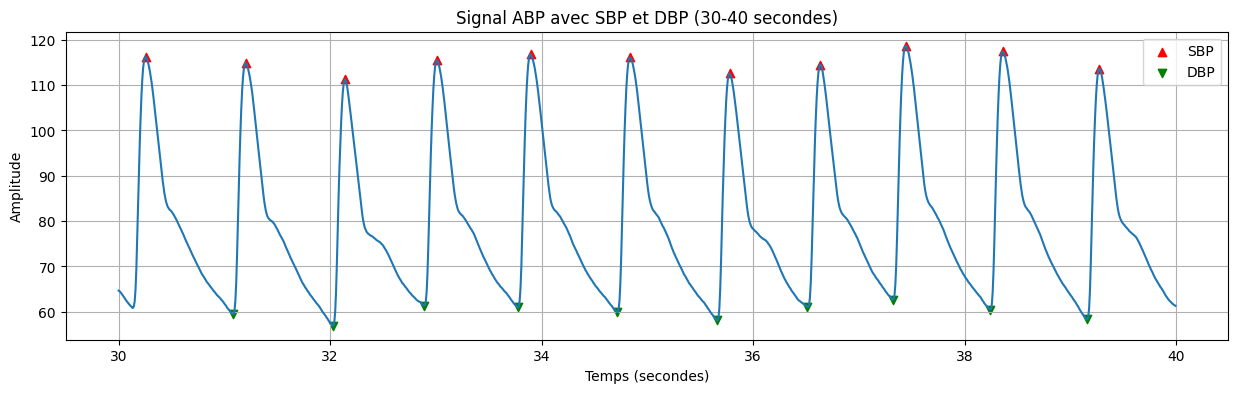

In [8]:
from scipy.signal import find_peaks

min_distance = int(0.6 * record_2.fs)

# Trouver les maxim et minim locaux
sbp_peaks, _ = find_peaks(signal_abp, distance=min_distance, prominence=5)
dbp_peaks, _ = find_peaks(-signal_abp, distance=min_distance, prominence=5)


sbp_values = signal_abp[sbp_peaks]
dbp_values = signal_abp[dbp_peaks]

# memem plot que avant pour le ABP
plt.figure(figsize=(15, 4))
plt.plot(temps_segment, signal_abp)

# On ajouter les peaks
plt.scatter(temps_segment[sbp_peaks], signal_abp[sbp_peaks], color='red', marker='^', label=f"SBP")
plt.scatter(temps_segment[dbp_peaks], signal_abp[dbp_peaks], color='green', marker='v', label=f"DBP")

plt.title(f"Signal ABP avec SBP et DBP (30-40 secondes)")
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


## 1.3 Filtre passe-bas de Butterworth

### Question 1

On applique un filtre passe-bas d'ordre 2 avec une fréquence de coupure à 4 Hz. Nous utilisons le même principe vu en TP1 (filtre passe-bande) sauf que cette fois nous allons créer un filtre passe-bas. On applique toujours le théorème de Nyquist pour normaliser les fréquences.

**Nota bene :** Nous utilisons filtfilt pour éviter le repliement spectral (aliasing) ainsi que des problèmes de synchronisation (déphasage).

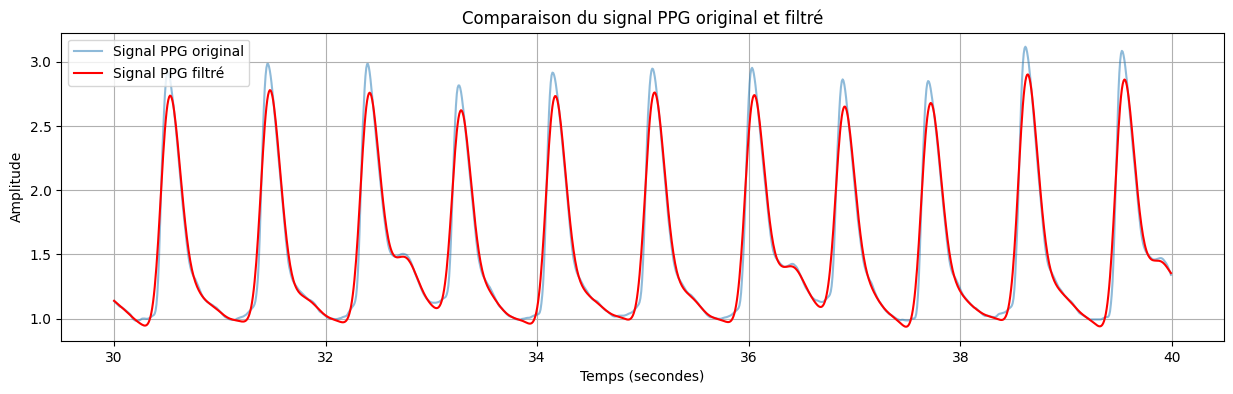

In [9]:
from scipy import signal

fc = 4
ordre = 2
nyq = 0.5 * record_2.fs

# Pour le filtre
a, b = signal.butter(ordre, fc / nyq, btype='low')

# Application du filtre
signal_ppg_filtered = signal.filtfilt(a, b, signal_ppg)

plt.figure(figsize=(15, 4))
plt.plot(temps_segment, signal_ppg, label='Signal PPG original', alpha=0.5)
plt.plot(temps_segment, signal_ppg_filtered, label='Signal PPG filtré', color='red')
plt.title('Comparaison du signal PPG original et filtré')
plt.xlabel('Temps (secondes)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### Question 2

Comme attendu par la définition du filtre passe-bas, nous pouvons observer la suppression des hautes fréquences. Cela nous permet de réduire le bruit et les artefacts selon le cours, ce qui nous amène à une accentuation de la forme globale du signal PPG.

## 1.4 Rééchantillonnage

### Question 1

Pour effectuer le rééchantillonnage du signal PPG filtré, nous allons nous baser sur le théorème de Nyquist qui impose que la fréquence d'échantillonnage soit au moins deux fois plus grande que la plus haute fréquence du signal *fs_nouveau = 2 × fmax*. Dans notre cas, après l'application du filtre passe-bas, fmax = 4 Hz, alors fe doit être supérieure à 8 Hz.

### Question 2

Ici nous sommes demandés d'écrire un code pour rééchantillonner le signal PPG filtré à 10 Hz. Déjà selon la question précédente, on peut s'assurer qu'avec une fréquence d'échantillonnage à 10 Hz nous n'aurons pas d'effets de repliement spectral (aliasing).

In [ ]:
from scipy.signal import resample_poly

fs = 125  # Fréquence initiale
fs_nouveau = 10  # Nouvelle fréquence visée

# Facteurs rationels (polyphase)
gcd = np.gcd(int(record_2.fs), fs_nouveau)
up = fs_nouveau // gcd    # 10 // 5 = 2
down = int(fs) // gcd    # 125 // 5 = 25

# Application du rééchantillonnage
signal_ppg_filtered_reechantillone = resample_poly(signal_ppg_filtered, up, down)

# Axe temporel rééchantillonné
time_resampled = np.arange(len(signal_ppg_filtered_reechantillone)) / fs_nouveau



### Question 3

Vu que la fréquence d'échantillonnage de base est 125 Hz, ça veut dire que nous avons 125 points chaque seconde. Selon le théorème de Nyquist, il suffit d'avoir au moins 8 points par seconde pour le signal PPG rééchantillonné pour représenter toutes les fluctuations du signal sans perte d'information importante. 

Pour notre cas, avec une fréquence de rééchantillonnage à 10 Hz nous conservons 10 points par seconde ou encore on conserve seulement 8 % des données car 10/125 = 0,08.

Ça nous permet d'avoir une diminution de la redondance temporelle selon laquelle les échantillons supprimés n'apportent pas d'information supplémentaire pour le contenu fréquentiel du signal filtré. Comme ça nous avons une quantité de données diminuée mais toujours représentative de notre situation, tout en garantissant l'absence d'aliasing grâce au filtre anti-repliement intégré à *resample_poly* selon notre sujet de TP2.

# Exercice 2 - Normalisation des données

## Chargement des données

Un dataset est déjà fourni pour faciliter l'exploitation de données. Nous avons des données pour l'entraînement et des données pour effectuer le test. Plus précisément :

* Data_Train_PPG.npy → (5000, 1250) : 5000 segments de 10 secondes de PPG (échantillonnés à 125 Hz → 1250 points par segment).
* Data_Train_Labels.npy → (5000, 2) : pour chaque segment, deux colonnes [SBP, DBP] correspondant à la moyenne de la pression systolique et diastolique dans ce segment.
* Data_Test_PPG.npy → (500, 1250) : 500 segments de PPG (même format que ci-dessus).
* Data_Test_Labels.npy → (500, 2) : valeurs moyennes de [SBP, DBP] associées.

Pour faire le chargement nous utilisons *np.load* et on effectue une vérification rapide grâce au paramètre *shape* pour vérifier les tailles de nos données.

In [11]:
train_ppg = np.load("data/Data_Train_PPG.npy") # (5000, 1250)
train_labels= np.load("data/Data_Train_Labels.npy") # (5000, 2)
test_ppg = np.load("data/Data_Test_PPG.npy") # (500, 1250)
test_labels = np.load("data/Data_Test_Labels.npy") # (500, 2)

# Verification rapide
print(f"Train PPG shape: {train_ppg.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test PPG shape: {test_ppg.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train PPG shape: (5000, 1250)
Train labels shape: (5000, 2)
Test PPG shape: (500, 1250)
Test labels shape: (500, 2)


## 2.1 Reshape des données

### Questions 1 et 2

Nous souhaitons appliquer une normalisation pour améliorer les performances et la stabilité de l'apprentissage de notre modèle. Ici nous allons procéder avec la normalisation globale.

Pour appliquer la normalisation globale, nous allons calculer les statistiques (min–max dans la partie 2.2) sur tous les points de l'ensemble de données afin de préserver la forme et les amplitudes relatives des signaux physiologiques. Donc, nous allons aplatir temporairement en un seul vecteur. Pour le cas de train_ppg, nous avons 5000 exemples avec 1250 points temporels pour chaque exemple. Alors, cela va nous donner 6 250 000 points dans une colonne puis on va appliquer *MinMaxScaler* pour faire la normalisation (partie 2.2 ci-dessous).

In [12]:
from sklearn.preprocessing import MinMaxScaler

# On fait l'aplatisement en un seul vecteur
train_ppg_reshaped = train_ppg.reshape(-1, 1)
test_ppg_reshaped = test_ppg.reshape(-1, 1)

print(f"\nAprès reshape train_ppg: {train_ppg_reshaped.shape}")
print(f"Après reshape test_ppg: {test_ppg_reshaped.shape}")


Après reshape train_ppg: (6250000, 1)
Après reshape test_ppg: (625000, 1)


## 2.2 Fit et transformation

### Questions 1, 2 et 3

Ici nous allons procéder avec la normalisation. La méthode Min-Max permet d'échelonner chaque caractéristique sur tous les exemples d'entraînement dans l'intervalle [0, 1]

In [13]:
print(f"Forme originale train_ppg: {train_ppg.shape}")
print(f"Forme originale test_ppg: {test_ppg.shape}")

# Appliquons mainteant la normalisation globale aux labels (characteristques)
global_scaler = MinMaxScaler()

global_scaler.fit(train_ppg_reshaped)

train_ppg_normalized = global_scaler.transform(train_ppg_reshaped)
test_ppg_normalized = global_scaler.transform(test_ppg_reshaped)

# retour a la forme initiale
train_ppg_normalized_reshaped = train_ppg_normalized.reshape(train_ppg.shape)
test_ppg_normalized_reshaped = test_ppg_normalized.reshape(test_ppg.shape)

print(f"\nForme finale train_ppg_normalized_reshaped: {train_ppg_normalized_reshaped.shape}")
print(f"Forme finale test_ppg_normalized_reshaped: {test_ppg_normalized_reshaped.shape}")

Forme originale train_ppg: (5000, 1250)
Forme originale test_ppg: (500, 1250)

Forme finale train_ppg_normalized_reshaped: (5000, 1250)
Forme finale test_ppg_normalized_reshaped: (500, 1250)


**Remarque :** La fonction *fit* calcule le min et max de chaque colonne (SBP et DBP) de la base de données train et les résultats sont sauvegardés sur *global_scaler*. Puis pour la normalisation des bases de données, on applique *transform* pour train et test également en utilisant cet scaler.

On remarque que pour la normalisation de la base de données de test nous utilisons les paramètres calculés avec la base de données train. Cela nous permet de maintenir la cohérence de l'échelle entre train et test.

De plus, ça nous permet d'éviter la fuite de données, ça veut dire que vu que le modèle pour s'entraîner ne doit jamais obtenir d'informations de la base de données test, dans tous les cas il faut éviter d'utiliser fit avec le test_ppg car ça va introduire un biais supplémentaire sur notre entraînement. Cela nous permet de garantir que les nouvelles données (pendant le test) sont inconnues pour simuler un scénario réel où on ne connaît pas les statistiques des futures données.

## 2.3 Visualisation

### Questions 1, 2 et 3

Ici nous sommes intéressés par l'exemple No 400 de la base de données d'entraînement avant et après normalisation.

**Nota bene :** Pour l'axe du temps, nous nous sommes basés sur le fait que la fréquence d'échantillonnage est 125 Hz. Donc, pour 10 secondes (partie 1.1 question 3) nous avons 1250 points dans notre cas.

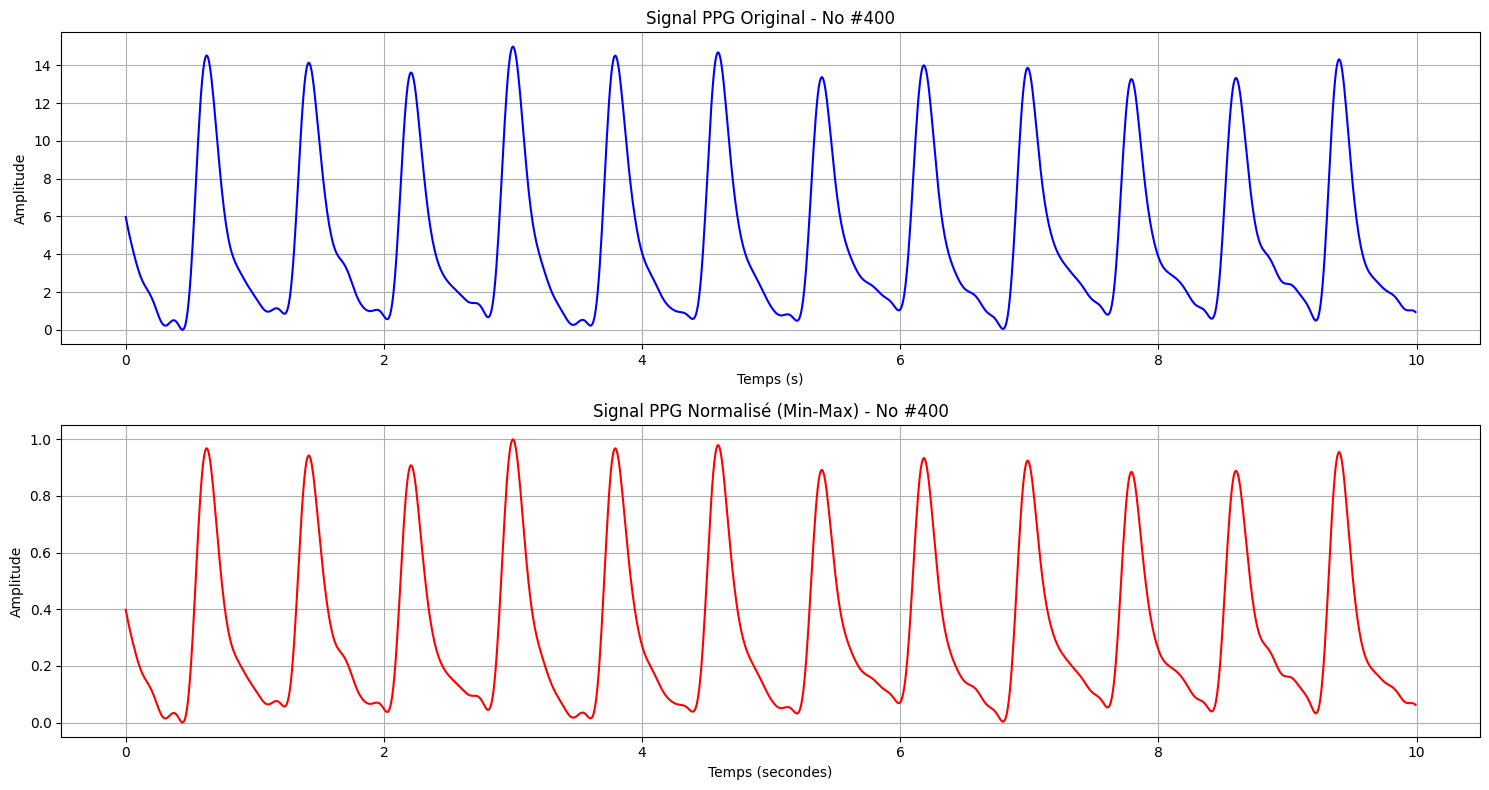

In [14]:
index = 400
ppg_avant = train_ppg[index, :]
ppg_apres = train_ppg_normalized_reshaped[index, :]

# pour l'affichage

fig, axes = plt.subplots(2, 1, figsize=(15, 4*2))

# pour le vecteur de temps
time = np.arange(1250) / 125
# print(time.shape)

# Signal avant normalisation
axes[0].plot(time, ppg_avant, 'b')
axes[0].set_title(f'Signal PPG Original - No #{index}')
axes[0].set_xlabel('Temps (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)

# Signal après normalsation

axes[1].plot(time, ppg_apres, 'r')
axes[1].set_title(f'Signal PPG Normalisé (Min-Max) - No #{index}')
axes[1].set_xlabel('Temps (secondes)')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Remarques et explications

On peut remarquer que l'amplitude du signal original a une échelle arbitraire, tandis que pour le signal normalisé l'échelle est entre 0 et 1. Dans tous les cas la forme du signal est préservée (principe de la normalisation), et les différentes variations sont maintenues également après la normalisation.

## 2.4 Normalisation des labels 

Maintenant nous sommes intéressés de procéder à la normalisation des labels. Nous avons deux labels dans cet exercice qui sont complètement indépendants donc la normalisation globale comme avant n'est pas adaptée. Ici plutôt on va normaliser chaque label individuellement sur la base de données d'entraînement et puis on appliquera ces paramètres calculés à la base de données de test comme vu à l'exercice 2.2 ci-dessus, pour garder une échelle cohérente. Voici l'implémentation :

In [15]:
label_scaler = MinMaxScaler()
train_labels_normalized = label_scaler.fit_transform(train_labels)
test_labels_normalized = label_scaler.transform(test_labels)

On veut valider quand même notre normalisation. On peut observer qu'après normalisation des labels le minimum est 0 et le maximum est 1 comme attendu.

In [16]:
print("Avant normalisation:")
print(f"Train SBP - Min: {train_labels[:, 0].min()}, Max: {train_labels[:, 0].max()} mmHg")
print(f"Train DBP - Min: {train_labels[:, 1].min()}, Max: {train_labels[:, 1].max()} mmHg")

print("\nAprès normalisation:")
print(f"Train SBP normalisé - Min: {train_labels_normalized[:, 0].min()}, Max: {train_labels_normalized[:, 0].max()}")
print(f"Train DBP normalisé - Min: {train_labels_normalized[:, 1].min()}, Max: {train_labels_normalized[:, 1].max()}")

Avant normalisation:
Train SBP - Min: 48.70640248002842, Max: 218.27409303288795 mmHg
Train DBP - Min: 24.299941875515916, Max: 131.45101708709672 mmHg

Après normalisation:
Train SBP normalisé - Min: 0.0, Max: 1.0
Train DBP normalisé - Min: 0.0, Max: 1.0


Dans cette dernière partie on va procéder avec une dénormalisation via *inverse_transform* afin de vérifier que les labels normalisés ne sont pas corrompus

In [17]:

inversed_labels = label_scaler.inverse_transform(train_labels_normalized[:5]) #pour les labels de 5 premiers exemples

print(f"Prédiction en mmHg: SBP={inversed_labels[0, 0]:.2f}, DBP={inversed_labels[0, 1]:.2f} mmHg")

Prédiction en mmHg: SBP=135.06, DBP=50.23 mmHg


# Exercice 3 - CNN/LSTM/MLP

On procède avec la définition de la fonction *build_cnn_lstm* qui retourne un modèle CNN-LSTM avec 4 blocs CNN, 3 blocs de LSTM avec une sortie qui peut prendre deux valeurs (SBP ou DBP), lorsqu'il a 4 couches denses.

**Nota bene :** Nous utilisons Keras pour cette implémentation.

In [18]:
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


**Notes :**

1. Le modèle CNN est utilisé pour détecter des motifs locaux du signal PPG sans être programmé auparavant. Comme ça on peut faire l'extraction/la caractérisation du signal.
2. Puis on utilise une série de LSTMs pour garder en mémoire cette série temporelle (le signal PPG) à long terme pour faire des décisions à court terme.
3. Pour finalement appliquer notre modèle MLP qui utilise ces données complexes pour estimer des valeurs numériques simples pour notre tâche de régression.

Finalement il s'agit bien d'une architecture hybride, car on utilise un CNN, un LSTM, et un MLP en ordre, pour l'estimation de la pression artérielle à partir de signaux PPG.

**Remarques :**

* Les couches de convolution 1D sont conçues pour les données séquentielles telles que les séries temporelles dont le signal PPG fait partie.
* Nous avons deux choses à considérer quand on parle de la taille : 1) la dimension temporelle qui correspond à la longueur du signal temporel à chaque niveau du modèle (nombre de pas de temps) et 2) la dimension spatiale qui correspond au nombre de caractéristiques par pas de temps.

## Construction de la fonction

Les arguments de la fonction *(input_shape, num_outputs=2)* correspondent à la forme du signal de l'entrée, et au nombre de sorties finales. Par défaut ce dernier est déclaré à 2 car nous avons soit SBP soit DBP, mais il est toujours déclarable si jamais nous en avons besoin.

In [18]:
from keras import Model
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, LSTM, Dense

def build_cnn_lstm_mlp(input_shape, num_outputs=2):

    # Etape 1 pour l'entree
    entrees = Input(shape=input_shape, name="PPG_input")

    # Etape 2 pour le bloc initial du CNN
    x = Conv1D(64, kernel_size=7, strides=2, padding="same", activation="relu")(entrees)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding="same")(x)

    # Etape 3 pour le 1er bloc CNN
    x = Conv1D(64, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv1D(64, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)

    # Etape 4 pour le 2eme bloc CNN (128 filtres)
    x = Conv1D(128, kernel_size=3, strides=2, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)

    # Etape 5 pour le 3eme bloc CNN (256 filtres)
    x = Conv1D(256, kernel_size=3, strides=2, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv1D(256, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)

    # Etape 6 pour le 4eme bloc CNN (512 filtres)
    x = Conv1D(512, kernel_size=3, strides=2, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv1D(512, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)

    # Etape 7 pour les couches LSTM
    x = LSTM(128, return_sequences=True)(x)
    x = LSTM(128, return_sequences=True)(x)
    x = LSTM(64, return_sequences=False)(x)

    # Etape 8 pour les couches denses
    x = Dense(1024, activation="relu")(x)
    x = Dense(1024, activation="relu")(x)
    x = Dense(512, activation="relu")(x)
    x = Dense(256, activation="relu")(x)

    # Etape 9 pour la couche de sortie
    sorties = Dense(num_outputs, activation=None)(x)

    # Etape 10 pour la création du modèle
    model = Model(inputs=entrees, outputs=sorties, name="CNN_LSTM_MLP")

    return model

# Test
model = build_cnn_lstm_mlp(input_shape=(1250, 1), num_outputs=2)
model.summary()

2025-12-08 22:32:20.253008: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-12-08 22:32:20.253070: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-12-08 22:32:20.253077: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 12.48 GB
2025-12-08 22:32:20.253115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-08 22:32:20.253138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "CNN_LSTM_MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ PPG_input (InputLayer)          │ (None, 1250, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 625, 64)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 625, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 313, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 313, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 313, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 313, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 313, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 157, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 157, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 157, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 157, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 79, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 79, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 79, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 79, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 40, 512)        │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 40, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 40, 512)        │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 40, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,865,218 (14.74 MB)

 Trainable params: 3,861,250 (14.73 MB)

 Non-trainable params: 3,968 (15.50 KB)

## Réponses aux questions

### Question 1

Dans notre exemple nous avons comme taille d'entrée du modèle 1250 points temporels par 1 canal.

### Question 2 

Au début, dans le bloc initial, nous avons 1250 de longueur de la séquence comme taille d'entrée du modèle. Vu que nous avons déclaré stride de 2, alors la convolution via le kernel va avancer de deux pas à la fois. Donc la taille après la première convolution est donnée par 1250 / 2 = 625 qui est cohérent par rapport au résumé d'avant. Une batch normalisation n'influence pas la taille de la séquence. Par contre le Max Pooling qui suit avec strides 2 va nous donner 625 / 2 = 313. 

Donc on rentre dans le premier bloc du CNN sur lequel on trouve deux normalisations par batch et deux convolutions 1D mais pas de stride déclaré, ça veut dire qu'il n'y a pas de changement temporel, donc la taille ne change pas pendant le 1er bloc.

Lors du 2ème bloc, on trouve une seule convolution avec un stride de 2 et deux normalisations par batch. Donc la nouvelle taille serait 313 / 2 = 157.

Maintenant on entre sur le 3ème bloc du CNN où se passe la même chose qu'au 2ème bloc sauf que le nombre de filtres change. Donc pour la taille on aura 157 / 2 = 79. Même concept pour le bloc 4 du CNN, ainsi au final la taille de sortie du CNN (avant le LSTM) est 79 / 2 = 40, la dimension temporelle réduite. Cependant la dimension spatiale a augmenté à 512 par rapport à 1 qu'on avait comme entrée.

### Question 3

Pour la taille d'entrée du LSTM ça va être du coup selon la question 2 (40, 512), ça veut dire 40 pas de temps séquentiels et 512 caractéristiques par pas de temps.

### Question 4

Pour les deux niveaux LSTM appliqués qui retournent des séquences, alors il n'y a pas de modification sur la taille. Cependant quand on applique *LSTM(64, return_sequences=False)(x)* alors ici on obtient 64 (dimension spatiale) comme taille de sortie du LSTM (avant le Dense), et nous n'avons plus de dimension temporelle car par définition un LSTM avec *return_sequences=False* agrège toute la séquence temporelle en un seul vecteur de sortie représentant l'état final caché de la couche LSTM

**a)** Comme nous l'avons déjà évoqué ci-dessus, T est la dimension temporelle compressée du signal donc c'est le nombre de pas de temps.

**b)** De l'autre côté, D représente les caractéristiques extraites par le CNN ça veut dire c'est le nombre de caractéristiques.

**c)** Selon la question 3, le LSTM reçoit 40 tranches temporelles où chaque tranche contient 512 caractéristiques extraites du signal PPG. C'est comme si le CNN découpait le signal en 40 moments clés et pour chaque moment, extrayait 512 informations pertinentes.

**d)** Dans un premier cas, imaginons que nous avons moins de filtres dans le dernier bloc convolutionnel avec strides/pooling inchangés. Alors il n'y a rien qui va changer concernant la forme d'entrée du LSTM au niveau nombre de pas de temps, par contre au niveau de la dimension des caractéristiques elle serait réduite. Cela pourrait impacter le modèle de la manière suivante : vu que le nombre de caractéristiques est diminué, alors nous sommes plus sensibles au sous-apprentissage. Le risque de sur-apprentissage est diminué également. Dans tous les cas l'apprentissage va être plus facile vu que nous avons moins de paramètres.

Dans un deuxième cas si nous avons moins de sous-échantillonnage temporel, ça veut dire par exemple supprimer un pooling ou mettre stride=1 dans une conv, alors on aura une taille de pas de temps élevée. Dans ce cas-là le temps d'apprentissage va augmenter car nous aurons des séquences de longueur plus grande (coûteux en calcul) mais potentiellement avec de meilleurs résultats car le modèle pourrait avoir plus d'informations sur la forme temporelle. Par contre le risque de sur-apprentissage augmente dans ce cas.

### Question 5 

La taille finale de sortie du modèle sera 2 car on veut avoir justement la valeur de la pression systolique (SBP) et la valeur de la pression diastolique (DBP).

### Question 6

Nous n'avons pas choisi de fonction d'activation pour la sortie car on veut récupérer une sortie linéaire qui nous permettra de faire la régression continue (notre objectif de base). Par exemple, si on utilisait ReLU on n'aurait pas de valeurs négatives et si on utilisait sigmoid les valeurs seraient limitées entre 0 et 1, tandis que les valeurs de pression peuvent varier librement.

# Exercice 4 - Entraînement, validation et évaluation

## 4.1 Division des données

### Question 1

Ici nous donnons 20% de la base de données pour la validation. Donc les 80 % qui restent vont être utilisés pour l'entraînement. Pour le test il y a une base de données dédiée pour ça.

In [19]:
from sklearn.model_selection import train_test_split

# y_train = X_train_labels et y_val = X_val_labels
X_train, X_val, y_train, y_val = train_test_split(
    train_ppg_normalized_reshaped, 
    train_labels_normalized,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# declaration des X et y pour le test
X_test = test_ppg_normalized_reshaped
y_test = test_labels_normalized

### Question 2

Maintenant on vérifie la taille de nos trois ensembles.

In [22]:
print(f"Taille initiale de train_ppg_normalized_reshaped: {train_ppg_normalized_reshaped.shape}")
print(f"Entraînement: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validation: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Test: X_test: {X_test.shape}, y_test: {y_test.shape}")

Taille initiale de train_ppg_normalized_reshaped: (5000, 1250)
Entraînement: X_train: (4000, 1250), y_train: (4000, 2)
Validation: X_val: (1000, 1250), y_val: (1000, 2)
Test: X_test: (500, 1250), y_test: (500, 2)


Alors, les 20% de 5000 donnent 1000 donc on peut bien observer que pour la validation nous avons 1000 échantillons et pour l'entraînement nous avons 5000 - 1000 = 4000 échantillons.

## 4.2 Entraînement avec EarlyStopping

Dans cette partie nous allons compiler le modèle d'entraînement tout en s'ajustant aux données d'entraînement.

### Question 1 - Préparation des données

Vu que la convolution 1D attend comme entrée un objet de dimension 3D de la forme (nb_exemples, longueur_sequence, nb_canaux) il faut ajouter encore une dimension à nos ensembles.

**Nota bene :** C'est demandé de le faire seulement pour le X_val et le X_train, mais quand on va tester la performance avec X_test, il faut qu'absolument X_test suive la même logique. Donc ici on procède avec une expansion pour l'ensemble d'entraînement, validation et test.

In [23]:
from tensorflow import expand_dims

X_train_expanded = expand_dims(X_train, axis=-1)
X_val_expanded = expand_dims(X_val, axis=-1)
X_test_expanded = expand_dims(X_test, axis=-1)  

# Verification
print(f"X_train_expanded shape: {X_train_expanded.shape}")
print(f"X_val_expanded shape: {X_val_expanded.shape}")
print(f"X_test_expanded shape: {X_test_expanded.shape}")

X_train_expanded shape: (4000, 1250, 1)
X_val_expanded shape: (1000, 1250, 1)
X_test_expanded shape: (500, 1250, 1)


Le nombre de canaux est 1 ici car le signal PPG est un signal unique.

### Question 2 - Choix du batch size

Nous allons faire un apprentissage par batch (mini-lots) car le nombre de données est modérément important. Cette méthode nous permet d'atteindre une convergence plus rapide en comparaison avec l'apprentissage par full-batch (lots).

* Pour une taille de batch petite, on aura plus de mises à jour des paramètres, mais on aura des calculs plus bruités.
* Pour une taille de batch grande, l'entraînement va être plus stable mais on aura besoin de plus de stockage disponible et d'une performance élevée (niveau GPU/CPU) pour que le modèle arrive à s'entraîner.

**Remarque :** Nous installons l'accelerateur BareMetal pour MacOS 

In [23]:
%pip install tensorflow-macos
%pip install tensorflow-metal

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import tensorflow as tf

batch_size = 16

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_expanded, y_train)).shuffle(4000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_expanded, y_val)).batch(batch_size)

# Verification
print(f"Batches d'entraînement: {len(train_dataset)}")
print(f"Batches de validation: {len(val_dataset)}")

Batches d'entraînement: 250
Batches de validation: 63


Alors les résultats du nombre de batches sont corrects car pour 4000/16 = 250 fois de mises à jour des paramètres. Pour la validation on a 1000/16 ≈ 63 mises à jour des paramètres. Finalement pour le test on a 500/16 ≈ 32 mises à jour des paramètres.

### Question 3 - Compilation

On va appliquer la fonction d'optimisation Adam avec un taux d'apprentissage à 0.0001, plus petit que le défaut pour un apprentissage plus stable. MSE sera utilisé comme fonction de coût et comme métrique à suivre pendant l'entraînement MAE va etre utilisé.

In [25]:
model = build_cnn_lstm_mlp((1250, 1)) # redefinition de la varibale model car elle etait utilise avant dans l'exercise 3
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
    metrics=['mae']
)

### Question 4 - Callbacks

Pour éviter le sur-apprentissage on va surveiller le *val_loss* et on va arrêter l'apprentissage si la convergence ne s'améliore plus pour un nombre d'époques donné, plus précisément on va arrêter l'entraînement s'il n'y a pas d'amélioration pendant 20 époques consécutives.

**Nota bene :** On utilise *restore_best_weights=True* pour ne pas perdre le modèle avec les meilleures performances.

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    mode='min',
)

Nous implémentons un checkpoint pour finalement sauvegarder le meilleur modèle.

In [27]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
)

### Question 5 - Entraînement

On effectue l'entraînement pour 100 époques. On avait dit que pour la base de données d'entraînement, 1 époque correspond à 250 mises à jour des paramètres. Donc pour 100 on aura au total 25 000 mises à jour au total.

In [28]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) # M1 Pro Max Tensorflow-Metal

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    callbacks=[early_stopping, checkpoint],
)

print(f"Nombre d'époques effectuées: {len(history.history['loss'])}")

Num GPUs Available:  1
Epoch 1/100


2025-12-05 23:15:25.429321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 205ms/step - loss: 0.0237 - mae: 0.1205 - val_loss: 0.0214 - val_mae: 0.1136
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 191ms/step - loss: 0.0160 - mae: 0.1002 - val_loss: 0.0158 - val_mae: 0.0983
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 199ms/step - loss: 0.0158 - mae: 0.0997 - val_loss: 0.0133 - val_mae: 0.0903
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 196ms/step - loss: 0.0142 - mae: 0.0944 - val_loss: 0.0190 - val_mae: 0.1119
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 205ms/step - loss: 0.0140 - mae: 0.0935 - val_loss: 0.0151 - val_mae: 0.0970
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 202ms/step - loss: 0.0148 - mae: 0.0961 - val_loss: 0.0129 - val_mae: 0.0893
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 189ms/step - loss: 0.0135 - mae: 0.0916 - val_loss: 0.0136 - val_mae: 0.0929
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 202ms/step - loss: 0.0129 - mae: 0.0895 - val_loss: 0.0136 - val_mae: 0.0908
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━

Nous remarquons que la dernière époque où il a mis à jour les poids était l'époque No 17 car pour les 20 prochaines Keras n'a pas réussi à trouver un meilleur *val_loss* en utilisant la méthode min qui était explicitement décrite au modèle Keras.

## 4.3 Courbes d'entraînement/validation

Ci-dessous on effectue l'extraction des données via *history.history['val_loss']* et *history.history['loss']* ainsi que pour le nombre d'époques total donné par *range(1, len(train_loss) + 1)*.

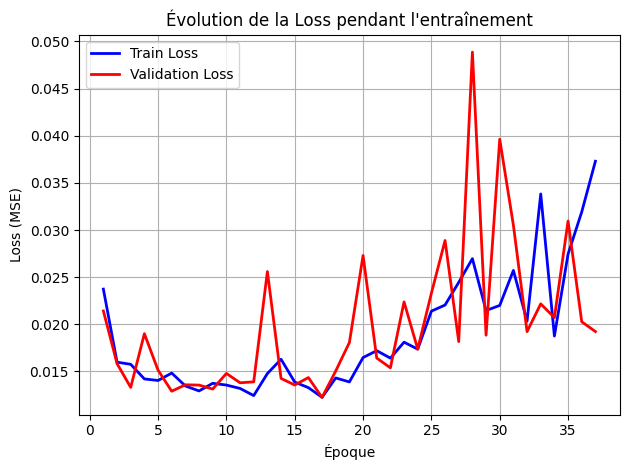

In [29]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(train_loss) + 1) # format vecteur pour l'affichage

# Pour loss
plt.plot(epochs, train_loss, 'b-', label='Train Loss', linewidth=2)
plt.plot(epochs, val_loss, 'r-', label='Validation Loss', linewidth=2)
plt.xlabel('Époque')
plt.ylabel('Loss (MSE)')
plt.title('Évolution de la Loss pendant l\'entraînement')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Commentaires

Nous observons qu'après la 17ème époque (batch), l'erreur du modèle de validation augmente et l'EarlyStopping intervient car le critère de patience n'est pas respecté (ici : 5).

In [30]:
min_val_loss_epoch = np.argmin(val_loss) + 1
if val_loss[-1] > val_loss[min_val_loss_epoch-1] * 1.1:
    print(f"Surajustement détecté après l'époque {min_val_loss_epoch}")
else:
    print(f"Pas de surajustement significatif détecté")

Surajustement détecté après l'époque 17


## 4.4 Evaluation du modele

Ici nous allons charger le meuilleur modele qui est sauvegardé sous le nom *best_model.keras*. Via la fonction *evaluate()* sur notre base de donnees de test, on va obtenir la perte finale et la MAE.

**Nota bene:** Nous avons deja pris en compte avant (pendant la creation des datasets et l'expansion de la dimension pour inclure le 1 canal d'information) que l’ensemble de test doit avoir la même dimension étendue que celles utilisées pour les ensembles d’entraînement et de validation.

In [67]:
best_model = tf.keras.models.load_model('best_model.keras')
test_loss, test_mae = best_model.evaluate(X_test_expanded, test_labels_normalized)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0137 - mae: 0.0880
Test Loss: 0.0137, Test MAE: 0.0880
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0137 - mae: 0.0880
Test Loss: 0.0137, Test MAE: 0.0880


**Remarque :** Ici on voit que Keras a fait 16/16. En fait nous avons 500 exemples dans la base de données de test. Par défaut Keras utilise 32 comme batch size pour evaluate, donc en faisant 500/32 = 15,625 ≈ 16 pour l'évaluation du modèle en utilisant la base de données. 

On fait des prédictions via la fonction *predict()* afin d'obtenir des valeurs de la pression artérielle prédites sur l'ensemble de test complet.

In [68]:
predictions = best_model.predict(X_test_expanded) # prediction sur l'ensemble de test

print(predictions.shape)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
(500, 2)
(500, 2)


On peut observer que nous avons 500 échantillons et pour chaque échantillon nous avons deux colonnes, une colonne pour la valeur SBP prédite et une colonne pour la valeur DBP prédite. Vu que les sorties du modèle sont normalisées, il faut absolument utiliser la fonction *inverse_transform()* pour récupérer les valeurs prédites en mmHg.

In [69]:
predictions_mmHg = label_scaler.inverse_transform(predictions) #denormalisation des predictions
targets_mmHg = label_scaler.inverse_transform(y_test)

Pour finalement calculer et afficher les métriques suivantes via numpy et *sklearn.metrics.mean_absolute_error* :

* ME
* MAE
* PD

In [70]:
from sklearn.metrics import mean_absolute_error

def calcul_metriques(true_values, predicted_values, label):
    errors = predicted_values - true_values
    me = np.mean(errors)
    mae = mean_absolute_error(true_values, predicted_values)
    sde = np.std(errors)

    print(f"\n{label}:")
    print(f"- ME (Erreur Moyenne): {me:.2f} mmHg")
    print(f"- MAE (Erreur Absolue Moyenne): {mae:.2f} mmHg")
    print(f"- SDE (Écart-type de l'erreur): {sde:.2f} mmHg")
    
    return me, mae, sde

# Pour SBP
sbp_me, sbp_mae, sbp_sde = calcul_metriques(
    targets_mmHg[:, 0], 
    predictions_mmHg[:, 0],
    "SBP (Pression Systolique)"
)

# Pour DBP
dbp_me, dbp_mae, dbp_sde = calcul_metriques(
    targets_mmHg[:, 1],
    predictions_mmHg[:, 1],
    "DBP (Pression Diastolique)"
)


SBP (Pression Systolique):
- ME (Erreur Moyenne): -4.74 mmHg
- MAE (Erreur Absolue Moyenne): 15.20 mmHg
- SDE (Écart-type de l'erreur): 19.60 mmHg

DBP (Pression Diastolique):
- ME (Erreur Moyenne): -0.08 mmHg
- MAE (Erreur Absolue Moyenne): 9.26 mmHg
- SDE (Écart-type de l'erreur): 12.36 mmHg


## 4.5 Visualisation des résultats

Dans cette partie on veut visualiser les performances du modèle pour mieux comprendre son comportement.

### Questions 1 et 2

On crée un nuage de points avec les valeurs de référence sur l'axe X et les valeurs prédites sur l'axe Y pour SBP et DBP respectivement.

Puis, on fait un graphique de Bland–Altman, un pour SBP et un pour DBP, pour lesquels l'axe x doit représenter la moyenne des valeurs prédites et cibles, et l'axe y doit représenter la différence entre valeurs prédites et cibles.

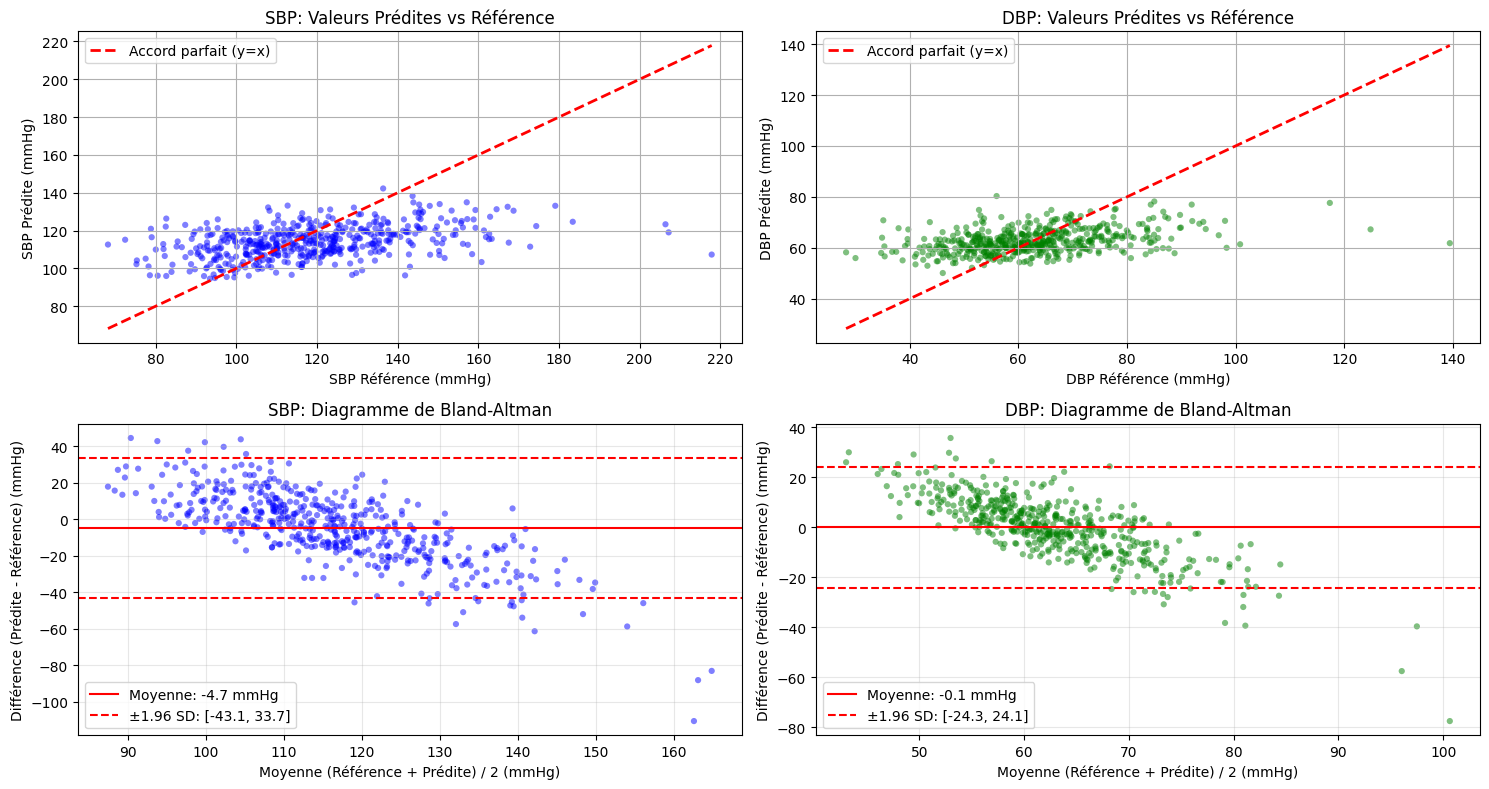

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(15, 4 * 2))

# Pour SBP
axes[0, 0].scatter(targets_mmHg[:, 0], predictions_mmHg[:, 0], alpha=0.5, s=20, c='blue', edgecolors='none')
axes[0, 0].plot([targets_mmHg[:, 0].min(), targets_mmHg[:, 0].max()], [targets_mmHg[:, 0].min(), targets_mmHg[:, 0].max()], 'r--', linewidth=2, label='Accord parfait (y=x)')
axes[0, 0].set_xlabel('SBP Référence (mmHg)')
axes[0, 0].set_ylabel('SBP Prédite (mmHg)')
axes[0, 0].set_title('SBP: Valeurs Prédites vs Référence')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Pour DBP
axes[0, 1].scatter(targets_mmHg[:, 1], predictions_mmHg[:, 1], alpha=0.5, s=20, c='green', edgecolors='none')
axes[0, 1].plot([targets_mmHg[:, 1].min(), targets_mmHg[:, 1].max()], [targets_mmHg[:, 1].min(), targets_mmHg[:, 1].max()], 'r--', linewidth=2, label='Accord parfait (y=x)')
axes[0, 1].set_xlabel('DBP Référence (mmHg)')
axes[0, 1].set_ylabel('DBP Prédite (mmHg)')
axes[0, 1].set_title('DBP: Valeurs Prédites vs Référence')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Calculs pour Bland-Altman
sbp_mean = (targets_mmHg[:, 0] + predictions_mmHg[:, 0]) / 2
sbp_diff = predictions_mmHg[:, 0] - targets_mmHg[:, 0]

sbp_mean_diff = np.mean(sbp_diff) # différence moyenne
sbp_std_diff = np.std(sbp_diff) # écart-type des différences

sbp_upper_limit = sbp_mean_diff + 1.96 * sbp_std_diff  # différence moyenne ± 1.96 × écart-type des différences
sbp_lower_limit = sbp_mean_diff - 1.96 * sbp_std_diff


dbp_mean = (targets_mmHg[:, 1] + predictions_mmHg[:, 1]) / 2
dbp_diff = predictions_mmHg[:, 1] - targets_mmHg[:, 1]

dbp_mean_diff = np.mean(dbp_diff)
dbp_std_diff = np.std(dbp_diff)
dbp_upper_limit = dbp_mean_diff + 1.96 * dbp_std_diff
dbp_lower_limit = dbp_mean_diff - 1.96 * dbp_std_diff

# Bland-Altman pour SBP
axes[1, 0].scatter(sbp_mean, sbp_diff, alpha=0.5, s=20, c='blue', edgecolors='none')
axes[1, 0].axhline(sbp_mean_diff, color='red', linestyle='-', 
                   label=f'Moyenne: {sbp_mean_diff:.1f} mmHg')
axes[1, 0].axhline(sbp_upper_limit, color='red', linestyle='--',
                   label=f'±1.96 SD: [{sbp_lower_limit:.1f}, {sbp_upper_limit:.1f}]')
axes[1, 0].axhline(sbp_lower_limit, color='red', linestyle='--')
axes[1, 0].set_xlabel('Moyenne (Référence + Prédite) / 2 (mmHg)')
axes[1, 0].set_ylabel('Différence (Prédite - Référence) (mmHg)')
axes[1, 0].set_title('SBP: Diagramme de Bland-Altman')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Bland-Altman pour DBP
axes[1, 1].scatter(dbp_mean, dbp_diff, alpha=0.5, s=20, c='green', edgecolors='none')
axes[1, 1].axhline(dbp_mean_diff, color='red', linestyle='-',
                   label=f'Moyenne: {dbp_mean_diff:.1f} mmHg')
axes[1, 1].axhline(dbp_upper_limit, color='red', linestyle='--',
                   label=f'±1.96 SD: [{dbp_lower_limit:.1f}, {dbp_upper_limit:.1f}]')
axes[1, 1].axhline(dbp_lower_limit, color='red', linestyle='--')
axes[1, 1].set_xlabel('Moyenne (Référence + Prédite) / 2 (mmHg)')
axes[1, 1].set_ylabel('Différence (Prédite - Référence) (mmHg)')
axes[1, 1].set_title('DBP: Diagramme de Bland-Altman')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Question 3

Selon le graphe de la fonction de coût, nous remarquons qu'après l'époque 35 il existe une instabilité sur l'entraînement, mais la courbe de validation reste globalement alignée sur celle d’entraînement, ce qui indique que la capacité de généralisation du modèle reste acceptable malgré ce bruit.

#### SBP
En ce qui concerne le SBP, la graphe des « valeurs prédit vs référence » montre une bonne corrélation globale, mais les points s’en écartent de plus en plus pour les valeurs élevées, avec une tendance à la sous‑estimation des fortes pressions. Le diagramme de Bland–Altman indique un biais moyen −4.7 mmHg. Ainsi on parle d'une légère sous‑estimation globale, et les limites d’accord sont assez larges. Il faut remarquer aussi qu'il existe plusieurs erreurs, le plus on augmente en magnitude, ce qui explique une variabilité importante pour les SBP élevées.​

#### DBP
Ici, pour le DBP, la graphe des « valeurs prédit vs référence » montre aussi une bonne corrélation pour les valeurs moyennes, mais on peut observer une sous‑estimation pour les pressions les plus élevées. De plus, le diagramme de Bland–Altman présente un biais moyen quasi nul (environ −0.1 mmHg), avec des limites d’accord larges mais légèrement plus resserrées que pour le SBP, ce qui montre une tendance pour une sous‑estimation concernat les valeurs de DBP élevées.

#### En général

On peut dire que le modèle a la tendance à prédire des valeurs proches de la moyenne et à sous‑estimer les valeurs extrêmes, ce qui suggère une variance d’erreur non constante (hétéroscédasticité) et un déséquilibre dans la distribution des exemples, avec relativement peu d’échantillons aux pressions très basses ou très hautes. Dans ce contexte, la fonction de coût MSE pénalise fortement les grandes erreurs, ce qui indique que peut-être notre modèle est complexe par rapport à la taille de la base de données.

Pour lutter contre ces problèmes, on pourrait augmenter les données ciblées soit en appliquant des transformations légères aux signaux PPG des cas extrêmes soit en suréchantillonnant les cas avec pressions extrêmes. En plus, on pouvait ajouter plus de dropouts dans les couches finales, ou utiliser la normalisation par batch dans les couches denses selon le cours.

## 4.6 Réglage des hyperparamètres

Ici on va essayer d'observer les résultats pour le réglage d'autres hyperparamètres et comment ça va impacter l'efficacité. Pour cela voici le choix :

- On change le batch size de 16 à 32
- Le learning_rate change de 0.0001 à 0.001
- On garde le principe d'entraînement par EarlyStopping

À noter que nous n'avons pas besoin de refaire une préparation des données (expansion puis normalisation) mais vu que le batch_size change, alors il faut absolument recréer les datasets pour faire l'évaluation et l'entraînement.

In [36]:
import pandas as pd

# Les combinaisons
batch_sizes = [16, 32, 64]
learning_rates = [1e-4, 1e-3]
results = []

for batch_size in batch_sizes:
    for lr in learning_rates:
        print(f"Batch Size = {batch_size}, Learning Rate = {lr}\n")
        
        # Formatage du learning rate pour le nom de fichier (remplacer le point par 'e')
        lr_str = f"{lr:.0e}".replace('.', '_').replace('+', '').replace('-0', '-')
        model_name = f"best_model_b{batch_size}_lr{lr_str}.keras"
        
        # CRecreation de datasets en fonction du batch_size choisi
        train_dataset = tf.data.Dataset.from_tensor_slices((X_train_expanded, y_train)).shuffle(4000).batch(batch_size)
        val_dataset = tf.data.Dataset.from_tensor_slices((X_val_expanded, y_val)).batch(batch_size)
        
        # Construction
        model = build_cnn_lstm_mlp((1250, 1))
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='mse',
            metrics=['mae']
        )
        
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            mode='min',
            verbose=0
        )
        
        checkpoint = tf.keras.callbacks.ModelCheckpoint(
            model_name,
            save_best_only=True,
            monitor='val_loss',
            mode='min',
            verbose=0
        )
        
        # Entraînement
        print(f"Début de l'entraînement...")
        history = model.fit(
            train_dataset,
            validation_data=val_dataset,
            epochs=100,
            callbacks=[early_stopping, checkpoint],
            verbose=0
        )
        
        
        epochs_completed = len(history.history['loss'])
        
        # Chargement du meilleur modele
        best_model = tf.keras.models.load_model(model_name)
        
        # Évaluation sur l'ensemble de test
        test_loss, test_mae = best_model.evaluate(X_test_expanded, test_labels_normalized, verbose=0)
        
        # Predictions
        predictions = best_model.predict(X_test_expanded, verbose=0)
        predictions_mmHg = label_scaler.inverse_transform(predictions)
        targets_mmHg = label_scaler.inverse_transform(y_test)
        
        # Pour SBP
        sbp_errors = predictions_mmHg[:, 0] - targets_mmHg[:, 0]
        sbp_me = np.mean(sbp_errors)
        sbp_mae = np.mean(np.abs(sbp_errors))
        sbp_sde = np.std(sbp_errors)
        
        # pour DBP
        dbp_errors = predictions_mmHg[:, 1] - targets_mmHg[:, 1]
        dbp_me = np.mean(dbp_errors)
        dbp_mae = np.mean(np.abs(dbp_errors))
        dbp_sde = np.std(dbp_errors)
        
        # nos metriques de base comme avant quoi
        final_train_loss = history.history['loss'][-1]
        final_val_loss = history.history['val_loss'][-1]
        best_val_loss = min(history.history['val_loss'])
        final_train_mae = history.history['mae'][-1]
        final_val_mae = history.history['val_mae'][-1]
        
        # Resultats en memoire
        results.append({
            'Batch Size': batch_size,
            'Learning Rate': lr,
            'Époques': epochs_completed,
            'Train Loss': final_train_loss,
            'Val Loss': final_val_loss,
            'Best Val Loss': best_val_loss,
            'Test Loss': test_loss,
            'Train MAE': final_train_mae,
            'Val MAE': final_val_mae,
            'Test MAE': test_mae,
            'SBP ME': sbp_me,
            'SBP MAE': sbp_mae,
            'SBP SDE': sbp_sde,
            'DBP ME': dbp_me,
            'DBP MAE': dbp_mae,
            'DBP SDE': dbp_sde,
            'Model File': model_name
        })
        
        print(f"Époques complétées: {epochs_completed}")
        print(f"\nPerformances sur l'ensemble de TEST:")
        print(f"- Test Loss (MSE): {test_loss:.4f}")
        print(f"- Test MAE: {test_mae:.4f}")
        print(f"\nMétriques SBP:")
        print(f"- ME (Erreur Moyenne): {sbp_me:.2f} mmHg")
        print(f"- MAE (Erreur Absolue Moyenne): {sbp_mae:.2f} mmHg")
        print(f"- SDE (Écart-type): {sbp_sde:.2f} mmHg")
        print(f"\nMétriques DBP:")
        print(f"- ME (Erreur Moyenne): {dbp_me:.2f} mmHg")
        print(f"- MAE (Erreur Absolue Moyenne): {dbp_mae:.2f} mmHg")
        print(f"- SDE (Écart-type): {dbp_sde:.2f} mmHg")
        print(f"\nModèle sauvegardé: {model_name}")
        print("---\n")
        
        # free-memory
        del model, best_model, history
        tf.keras.backend.clear_session()


# comparaison des resultats via pandas
df_results = pd.DataFrame(results)
best_test_loss_idx = df_results['Test Loss'].idxmin()
best_sbp_mae_idx = df_results['SBP MAE'].idxmin()
best_dbp_mae_idx = df_results['DBP MAE'].idxmin()

print("--------------------")
print(f"\nMeilleure Test Loss (MSE):")
print(f"- Batch Size: {df_results.loc[best_test_loss_idx, 'Batch Size']}, "
      f"Learning Rate: {df_results.loc[best_test_loss_idx, 'Learning Rate']}")
print(f"- Test Loss: {df_results.loc[best_test_loss_idx, 'Test Loss']:.4f}")

print(f"\nMeilleure SBP MAE:")
print(f"- Batch Size: {df_results.loc[best_sbp_mae_idx, 'Batch Size']}, "
      f"Learning Rate: {df_results.loc[best_sbp_mae_idx, 'Learning Rate']}")
print(f"- SBP MAE: {df_results.loc[best_sbp_mae_idx, 'SBP MAE']:.2f} mmHg")

print(f"\nMeilleure DBP MAE:")
print(f"- Batch Size: {df_results.loc[best_dbp_mae_idx, 'Batch Size']}, "
      f"Learning Rate: {df_results.loc[best_dbp_mae_idx, 'Learning Rate']}")
print(f"- DBP MAE: {df_results.loc[best_dbp_mae_idx, 'DBP MAE']:.2f} mmHg")


Batch Size = 16, Learning Rate = 0.0001

Début de l'entraînement...
Époques complétées: 49

Performances sur l'ensemble de TEST:
- Test Loss (MSE): 0.0142
- Test MAE: 0.0912

Métriques SBP:
- ME (Erreur Moyenne): 2.97 mmHg
- MAE (Erreur Absolue Moyenne): 16.01 mmHg
- SDE (Écart-type): 20.25 mmHg

Métriques DBP:
- ME (Erreur Moyenne): -2.44 mmHg
- MAE (Erreur Absolue Moyenne): 9.43 mmHg
- SDE (Écart-type): 12.32 mmHg

Modèle sauvegardé: best_model_b16_lr1e-4.keras
---

Batch Size = 16, Learning Rate = 0.001

Début de l'entraînement...
Époques complétées: 22

Performances sur l'ensemble de TEST:
- Test Loss (MSE): 0.0157
- Test MAE: 0.0966

Métriques SBP:
- ME (Erreur Moyenne): -1.84 mmHg
- MAE (Erreur Absolue Moyenne): 16.73 mmHg
- SDE (Écart-type): 21.47 mmHg

Métriques DBP:
- ME (Erreur Moyenne): -0.95 mmHg
- MAE (Erreur Absolue Moyenne): 10.12 mmHg
- SDE (Écart-type): 13.23 mmHg

Modèle sauvegardé: best_model_b16_lr1e-3.keras
---

Batch Size = 32, Learning Rate = 0.0001

Début de l'e

Ici nous avons testé 6 combinaisons d'hyperparamètres pour essayer d'optimiser notre modèle CNN-LSTM-MLP. En général, les grands batch sizes avec learning rate élevé devraient converger plus rapidement mais potentiellement vers des solutions sous-optimales. De l'autre côté, les petits batch sizes avec un learning rate faible devraient donner des résultats plus stables mais nécessiter plus de temps.

Pour un batch size à 32, on s'attend à être 2 fois plus rapide que le batch size 16 avec un gradient plus stable (quand on considère le même learning rate à 0.0001). Pour un batch size de 64, on s'attend à un entraînement encore plus rapide mais on risque d'avoir une convergence vers un minimum local.

En ce qui concerne le learning rate à 0,0001, on s'attend quand même à une convergence stable et progressive avec un risque réduit d'oscillations. Cependant la convergence est plus lente. De l'autre côté, pour 0.001 on aura une convergence 10 fois plus rapide mais il peut "sauter" par-dessus de bons minima.

Ici, le meilleur modèle est celui avec taille de batch à 32 et taux d'apprentissage à 0.0001 finalement. 

# Exercise 5 - Impact du taux d’échantillonnage

## Question 1

Ici du coup, on va s'inspirer par l'exercise 1.3 de ce TP. Il est demandé de faire un re-echantillonge tout en evitant les effets de rempliement spectrale. Donc il faut respecter le theoreme de Nyquist. Comme pour le cas de re-echantilonage à 8Hz, 10Hz etait choisi pour etre sur qu'on va perdre enormement d'information essentiel. Donc ici on a :

In [47]:
import numpy as np
from scipy import signal
from scipy.signal import resample_poly

def apply_antialiasing_filter(data, original_fs, target_fs):

    nyq = 0.5 * target_fs
    fc = 0.8 * nyq  # 0.8 × Nyquist pour éviter les effets de bords
    ordre = 4 
    
    b, a = signal.butter(ordre, fc / (0.5 * original_fs), btype='low')
    
    # Application du filtre (filtfilt pour éviter le déphasage)
    filtered_data = signal.filtfilt(b, a, data, axis=1)
    
    # Facters de rechantillonnage (polyphase)
    gcd = np.gcd(int(original_fs), int(target_fs))
    up = int(target_fs) // gcd
    down = int(original_fs) // gcd
    
    resampled_data = resample_poly(filtered_data, up, down, axis=1)
    
    return resampled_data

En ce qui cocnerne la choix du filtre, il faut utiliser un filtre passe bas pour supprimer les composantes au‑delà des nouveaux fréquence de Nyquist. Pour cela on peut cosntruire un filtre Butterworth, d'ordre 4 pour équilibrer la raideur de la pente de coupure. Comme attendue, la fonction *filtfilt* evite le dephasage.

## Question 2 

Mainteant on va entrainer un modele CNN-LSTM-MLP pour les deux nouveaux donnees reechantillones. Avant arriver à l'entarinement, il faut créer les datasets, et faire la normalisation necessaire (MinMax).

In [48]:
train_ppg_20 = apply_antialiasing_filter(train_ppg, 125, 20)
test_ppg_20 = apply_antialiasing_filter(test_ppg, 125, 20)

train_ppg_5 = apply_antialiasing_filter(train_ppg, 125, 5)
test_ppg_5 = apply_antialiasing_filter(test_ppg, 125, 5)

Maintenant on va vérifier les formes des données rééchantillonnées :

In [49]:
print("Données à 20 Hz:")
print(f"Train PPG 20Hz shape: {train_ppg_20.shape}")
print(f"Test PPG 20Hz shape: {test_ppg_20.shape}")

print("\nDonnées à 5 Hz:")
print(f"Train PPG 5Hz shape: {train_ppg_5.shape}")
print(f"Test PPG 5Hz shape: {test_ppg_5.shape}")

Données à 20 Hz:
Train PPG 20Hz shape: (5000, 200)
Test PPG 20Hz shape: (500, 200)

Données à 5 Hz:
Train PPG 5Hz shape: (5000, 50)
Test PPG 5Hz shape: (500, 50)


Comme attendu, pour 20 Hz nous avons 200 points (10 secondes × 20 Hz) et pour 5 Hz nous avons 50 points (10 secondes × 5 Hz).

### Normalisation des données rééchantillonnées

On applique la même normalisation Min-Max que dans l'exercice 2 :

In [50]:
# Normalisation pour 20 Hz
from sklearn.preprocessing import MinMaxScaler

scaler_20 = MinMaxScaler()
train_ppg_20_reshaped = train_ppg_20.reshape(-1, 1)
test_ppg_20_reshaped = test_ppg_20.reshape(-1, 1)

scaler_20.fit(train_ppg_20_reshaped)
train_ppg_20_normalized = scaler_20.transform(train_ppg_20_reshaped).reshape(train_ppg_20.shape)
test_ppg_20_normalized = scaler_20.transform(test_ppg_20_reshaped).reshape(test_ppg_20.shape)

# Normalisation pour 5 Hz
scaler_5 = MinMaxScaler()
train_ppg_5_reshaped = train_ppg_5.reshape(-1, 1)
test_ppg_5_reshaped = test_ppg_5.reshape(-1, 1)

scaler_5.fit(train_ppg_5_reshaped)
train_ppg_5_normalized = scaler_5.transform(train_ppg_5_reshaped).reshape(train_ppg_5.shape)
test_ppg_5_normalized = scaler_5.transform(test_ppg_5_reshaped).reshape(test_ppg_5.shape)

### Division des données

On applique le même regle de division 80/20 pour la base des donnees entraînement/validation :

In [55]:
from sklearn.model_selection import train_test_split

# Division pour 20 Hz
X_train_20, X_val_20, y_train_20, y_val_20 = train_test_split(
    train_ppg_20_normalized,
    train_labels_normalized,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

X_test_20 = test_ppg_20_normalized
y_test_20 = test_labels_normalized

# Division pour 5 Hz
X_train_5, X_val_5, y_train_5, y_val_5 = train_test_split(
    train_ppg_5_normalized,
    train_labels_normalized,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

X_test_5 = test_ppg_5_normalized
y_test_5 = test_labels_normalized

print(f"20 Hz: Train: {X_train_20.shape}, Val: {X_val_20.shape}, Test: {X_test_20.shape}\n")
print(f"5 Hz: Train: {X_train_5.shape}, Val: {X_val_5.shape}, Test: {X_test_5.shape}")

20 Hz: Train: (4000, 200), Val: (1000, 200), Test: (500, 200)

5 Hz: Train: (4000, 50), Val: (1000, 50), Test: (500, 50)


### Création des datasets

Comme on a fait pour l'exercice 4, on crée les datasets TensorFlow :

In [54]:
from tensorflow import expand_dims
import tensorflow as tf

# pour 20 Hz
X_train_20_expanded = expand_dims(X_train_20, axis=-1)
X_val_20_expanded = expand_dims(X_val_20, axis=-1)
X_test_20_expanded = expand_dims(X_test_20, axis=-1)

# Pour 5 Hz
X_train_5_expanded = expand_dims(X_train_5, axis=-1)
X_val_5_expanded = expand_dims(X_val_5, axis=-1)
X_test_5_expanded = expand_dims(X_test_5, axis=-1)

# Utilisation du meilleur batch size trouvé dans l'exercice 4.6 (64)
batch_size_optimal = 64

# Datasets pour 20 Hz
train_dataset_20 = tf.data.Dataset.from_tensor_slices((X_train_20_expanded, y_train_20)).shuffle(4000).batch(batch_size_optimal)
val_dataset_20 = tf.data.Dataset.from_tensor_slices((X_val_20_expanded, y_val_20)).batch(batch_size_optimal)

# Datasets pour 5 Hz
train_dataset_5 = tf.data.Dataset.from_tensor_slices((X_train_5_expanded, y_train_5)).shuffle(4000).batch(batch_size_optimal)
val_dataset_5 = tf.data.Dataset.from_tensor_slices((X_val_5_expanded, y_val_5)).batch(batch_size_optimal)

print(f"20 Hz : {X_train_20_expanded.shape}")
print(f"5 Hz : {X_train_5_expanded.shape}")

20 Hz : (4000, 200, 1)
5 Hz : (4000, 50, 1)


### Entraînement du modèle à 20 Hz

On utilise les meilleurs hyperparamètres trouvés dans l'exercice 4.6 : batch_size=32 et learning_rate=0.0001. Puis on va effectuer une analyser pour voir si vraiment eux etais les meuilleurs hyperparametres.

In [56]:
input_shape_20 = (X_train_20_expanded.shape[1], 1)

model_20 = build_cnn_lstm_mlp(input_shape_20)
model_20.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callbacks
early_stopping_20 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    mode='min',
    verbose=0
)

checkpoint_20 = tf.keras.callbacks.ModelCheckpoint(
    'best_model_20Hz.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=0
)

# Entraînement
print("Début de l'entraînement pour 20 Hz...")
history_20 = model_20.fit(
    train_dataset_20,
    validation_data=val_dataset_20,
    epochs=100,
    callbacks=[early_stopping_20, checkpoint_20],
    verbose=0
)

print(f"Nombre d'époques effectuées pour 20 Hz: {len(history_20.history['loss'])}")

Début de l'entraînement pour 20 Hz...
Nombre d'époques effectuées pour 20 Hz: 24
Nombre d'époques effectuées pour 20 Hz: 24


### Évaluation du modèle à 20 Hz

Pour l'évaluation du modèle on calcule également les métriques ME, MAE, SDE pour créer le graphe de Bland-Altman ci-dessous :

In [57]:
# Chargement du meilleur modèle
best_model_20 = tf.keras.models.load_model('best_model_20Hz.keras')

test_loss_20, test_mae_20 = best_model_20.evaluate(X_test_20_expanded, y_test_20, verbose=0)
print(f"\n20 Hz - Test Loss: {test_loss_20:.4f}, Test MAE: {test_mae_20:.4f}")

# Predictions
predictions_20 = best_model_20.predict(X_test_20_expanded, verbose=0)
predictions_20_mmHg = label_scaler.inverse_transform(predictions_20)
targets_20_mmHg = label_scaler.inverse_transform(y_test_20)

# Calcul des metriques
sbp_errors_20 = predictions_20_mmHg[:, 0] - targets_20_mmHg[:, 0]
sbp_me_20 = np.mean(sbp_errors_20)
sbp_mae_20 = np.mean(np.abs(sbp_errors_20))
sbp_sde_20 = np.std(sbp_errors_20)

dbp_errors_20 = predictions_20_mmHg[:, 1] - targets_20_mmHg[:, 1]
dbp_me_20 = np.mean(dbp_errors_20)
dbp_mae_20 = np.mean(np.abs(dbp_errors_20))
dbp_sde_20 = np.std(dbp_errors_20)

print(f"\nMétriques SBP (20 Hz):")
print(f"- ME: {sbp_me_20:.2f} mmHg")
print(f"- MAE: {sbp_mae_20:.2f} mmHg")
print(f"- SDE: {sbp_sde_20:.2f} mmHg")
print(f"\nMétriques DBP (20 Hz):")
print(f"- ME: {dbp_me_20:.2f} mmHg")
print(f"- MAE: {dbp_mae_20:.2f} mmHg")
print(f"- SDE: {dbp_sde_20:.2f} mmHg")


20 Hz - Test Loss: 0.0178, Test MAE: 0.1003

Métriques SBP (20 Hz):
- ME: -8.17 mmHg
- MAE: 17.55 mmHg
- SDE: 21.66 mmHg

Métriques DBP (20 Hz):
- ME: -3.98 mmHg
- MAE: 10.41 mmHg
- SDE: 13.40 mmHg

Métriques SBP (20 Hz):
- ME: -8.17 mmHg
- MAE: 17.55 mmHg
- SDE: 21.66 mmHg

Métriques DBP (20 Hz):
- ME: -3.98 mmHg
- MAE: 10.41 mmHg
- SDE: 13.40 mmHg


### Diagrammes de Bland-Altman pour 20 Hz

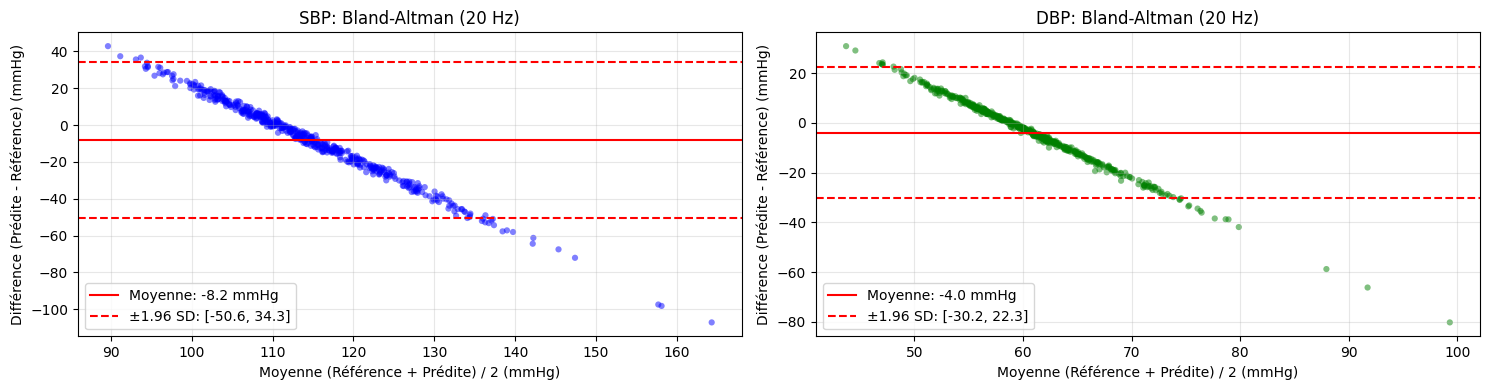

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Calculs pour Bland-Altman SBP
sbp_mean_20 = (targets_20_mmHg[:, 0] + predictions_20_mmHg[:, 0]) / 2
sbp_diff_20 = predictions_20_mmHg[:, 0] - targets_20_mmHg[:, 0]
sbp_upper_limit_20 = sbp_me_20 + 1.96 * sbp_sde_20
sbp_lower_limit_20 = sbp_me_20 - 1.96 * sbp_sde_20

# Calculs pour Bland-Altman DBP
dbp_mean_20 = (targets_20_mmHg[:, 1] + predictions_20_mmHg[:, 1]) / 2
dbp_diff_20 = predictions_20_mmHg[:, 1] - targets_20_mmHg[:, 1]
dbp_upper_limit_20 = dbp_me_20 + 1.96 * dbp_sde_20
dbp_lower_limit_20 = dbp_me_20 - 1.96 * dbp_sde_20

# Bland-Altman pour SBP
axes[0].scatter(sbp_mean_20, sbp_diff_20, alpha=0.5, s=20, c='blue', edgecolors='none')
axes[0].axhline(sbp_me_20, color='red', linestyle='-', 
                label=f'Moyenne: {sbp_me_20:.1f} mmHg')
axes[0].axhline(sbp_upper_limit_20, color='red', linestyle='--',
                label=f'±1.96 SD: [{sbp_lower_limit_20:.1f}, {sbp_upper_limit_20:.1f}]')
axes[0].axhline(sbp_lower_limit_20, color='red', linestyle='--')
axes[0].set_xlabel('Moyenne (Référence + Prédite) / 2 (mmHg)')
axes[0].set_ylabel('Différence (Prédite - Référence) (mmHg)')
axes[0].set_title('SBP: Bland-Altman (20 Hz)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Bland-Altman pour DBP
axes[1].scatter(dbp_mean_20, dbp_diff_20, alpha=0.5, s=20, c='green', edgecolors='none')
axes[1].axhline(dbp_me_20, color='red', linestyle='-',
                label=f'Moyenne: {dbp_me_20:.1f} mmHg')
axes[1].axhline(dbp_upper_limit_20, color='red', linestyle='--',
                label=f'±1.96 SD: [{dbp_lower_limit_20:.1f}, {dbp_upper_limit_20:.1f}]')
axes[1].axhline(dbp_lower_limit_20, color='red', linestyle='--')
axes[1].set_xlabel('Moyenne (Référence + Prédite) / 2 (mmHg)')
axes[1].set_ylabel('Différence (Prédite - Référence) (mmHg)')
axes[1].set_title('DBP: Bland-Altman (20 Hz)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Entraînement du modèle à 5 Hz

Maintenant on entraîne le modèle avec les données rééchantillonnées à 5 Hz. On suit le même processus vu pour le rééchantillonnage à 20 Hz :

In [59]:
input_shape_5 = (X_train_5_expanded.shape[1], 1)

model_5 = build_cnn_lstm_mlp(input_shape_5)
model_5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callbacks
early_stopping_5 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    mode='min',
    verbose=0
)

checkpoint_5 = tf.keras.callbacks.ModelCheckpoint(
    'best_model_5Hz.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=0
)

# Entraînement
print("Début de l'entraînement pour 5 Hz...")
history_5 = model_5.fit(
    train_dataset_5,
    validation_data=val_dataset_5,
    epochs=100,
    callbacks=[early_stopping_5, checkpoint_5],
    verbose=0
)

print(f"Nombre d'époques effectuées pour 5 Hz: {len(history_5.history['loss'])}")

Début de l'entraînement pour 5 Hz...
Nombre d'époques effectuées pour 5 Hz: 22
Nombre d'époques effectuées pour 5 Hz: 22


### Évaluation du modèle à 5 Hz

In [60]:
# Chargement du meilleur modèle
best_model_5 = tf.keras.models.load_model('best_model_5Hz.keras')

# Évaluation
test_loss_5, test_mae_5 = best_model_5.evaluate(X_test_5_expanded, y_test_5, verbose=0)
print(f"\n5 Hz - Test Loss: {test_loss_5:.4f}, Test MAE: {test_mae_5:.4f}")

# Prédictions
predictions_5 = best_model_5.predict(X_test_5_expanded, verbose=0)
predictions_5_mmHg = label_scaler.inverse_transform(predictions_5)
targets_5_mmHg = label_scaler.inverse_transform(y_test_5)

# Calcul des métriques
sbp_errors_5 = predictions_5_mmHg[:, 0] - targets_5_mmHg[:, 0]
sbp_me_5 = np.mean(sbp_errors_5)
sbp_mae_5 = np.mean(np.abs(sbp_errors_5))
sbp_sde_5 = np.std(sbp_errors_5)

dbp_errors_5 = predictions_5_mmHg[:, 1] - targets_5_mmHg[:, 1]
dbp_me_5 = np.mean(dbp_errors_5)
dbp_mae_5 = np.mean(np.abs(dbp_errors_5))
dbp_sde_5 = np.std(dbp_errors_5)

print(f"\nMétriques SBP (5 Hz):")
print(f"- ME: {sbp_me_5:.2f} mmHg")
print(f"- MAE: {sbp_mae_5:.2f} mmHg")
print(f"- SDE: {sbp_sde_5:.2f} mmHg")
print(f"\nMétriques DBP (5 Hz):")
print(f"- ME: {dbp_me_5:.2f} mmHg")
print(f"- MAE: {dbp_mae_5:.2f} mmHg")
print(f"- SDE: {dbp_sde_5:.2f} mmHg")


5 Hz - Test Loss: 0.0160, Test MAE: 0.0977

Métriques SBP (5 Hz):
- ME: 2.46 mmHg
- MAE: 17.14 mmHg
- SDE: 21.53 mmHg

Métriques DBP (5 Hz):
- ME: -0.78 mmHg
- MAE: 10.11 mmHg
- SDE: 13.38 mmHg

Métriques SBP (5 Hz):
- ME: 2.46 mmHg
- MAE: 17.14 mmHg
- SDE: 21.53 mmHg

Métriques DBP (5 Hz):
- ME: -0.78 mmHg
- MAE: 10.11 mmHg
- SDE: 13.38 mmHg


### Diagrammes de Bland-Altman pour 5 Hz

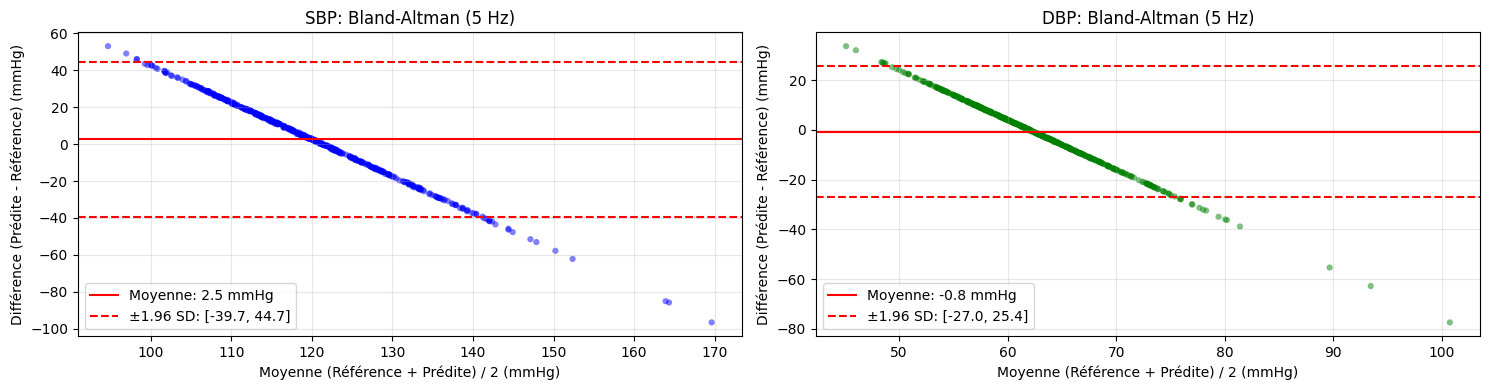

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Calculs pour Bland-Altman SBP
sbp_mean_5 = (targets_5_mmHg[:, 0] + predictions_5_mmHg[:, 0]) / 2
sbp_diff_5 = predictions_5_mmHg[:, 0] - targets_5_mmHg[:, 0]
sbp_upper_limit_5 = sbp_me_5 + 1.96 * sbp_sde_5
sbp_lower_limit_5 = sbp_me_5 - 1.96 * sbp_sde_5

# Calculs pour Bland-Altman DBP
dbp_mean_5 = (targets_5_mmHg[:, 1] + predictions_5_mmHg[:, 1]) / 2
dbp_diff_5 = predictions_5_mmHg[:, 1] - targets_5_mmHg[:, 1]
dbp_upper_limit_5 = dbp_me_5 + 1.96 * dbp_sde_5
dbp_lower_limit_5 = dbp_me_5 - 1.96 * dbp_sde_5

# Bland-Altman pour SBP
axes[0].scatter(sbp_mean_5, sbp_diff_5, alpha=0.5, s=20, c='blue', edgecolors='none')
axes[0].axhline(sbp_me_5, color='red', linestyle='-', 
                label=f'Moyenne: {sbp_me_5:.1f} mmHg')
axes[0].axhline(sbp_upper_limit_5, color='red', linestyle='--',
                label=f'±1.96 SD: [{sbp_lower_limit_5:.1f}, {sbp_upper_limit_5:.1f}]')
axes[0].axhline(sbp_lower_limit_5, color='red', linestyle='--')
axes[0].set_xlabel('Moyenne (Référence + Prédite) / 2 (mmHg)')
axes[0].set_ylabel('Différence (Prédite - Référence) (mmHg)')
axes[0].set_title('SBP: Bland-Altman (5 Hz)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Bland-Altman pour DBP
axes[1].scatter(dbp_mean_5, dbp_diff_5, alpha=0.5, s=20, c='green', edgecolors='none')
axes[1].axhline(dbp_me_5, color='red', linestyle='-',
                label=f'Moyenne: {dbp_me_5:.1f} mmHg')
axes[1].axhline(dbp_upper_limit_5, color='red', linestyle='--',
                label=f'±1.96 SD: [{dbp_lower_limit_5:.1f}, {dbp_upper_limit_5:.1f}]')
axes[1].axhline(dbp_lower_limit_5, color='red', linestyle='--')
axes[1].set_xlabel('Moyenne (Référence + Prédite) / 2 (mmHg)')
axes[1].set_ylabel('Différence (Prédite - Référence) (mmHg)')
axes[1].set_title('DBP: Bland-Altman (5 Hz)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Analyse des graphes Bland-Altman (entrainé sur le modele de base)

Les diagrammes de Bland-Altman révèlent des patterns intéressants concernant la distribution des erreurs. Par exemple, pour les 20 Hz on observe un biais légèrement négatif pour la SBP (-8.2 mmHg - une tendance à la sous-estimation), tandis que la DBP montre un biais plus modéré (-4.0 mmHg). Les limites d'accord restent larges mais comparables en indiquant que la précision absolue est plus affectée que la consistance des prédictions.

## Question 3
### Adaptation des hyperparamètres

Lors de la réduction du taux d'échantillonnage, le signal contient moins de points temporels, ce qui justifie une adaptation de l'architecture du modèle. Donc ici on va tester certaines configurations en ajustant :
- Le nombre de blocs CNN
- Le nombre d'unités LSTM
- La taille du réseau MLP

### Exploration ad hoc

Plus spécifiquement, pour les signaux à basse fréquence (20 Hz et 5 Hz), nous testons des architectures plus légères car nous avons moins de points temporels donc moins de motifs locaux à détecter (moins de couches CNN nécessaires), de plus les séquences sont plus courtes, ainsi il existe moins de dépendances à long terme et donc moins d'unités LSTM nécessaires, et finalement nous avons moins de caractéristiques à extraire donc on cherche un MLP plus petit.

En effet, pour évaluer l'impact du taux d'échantillonnage, une approche d'exploration ad hoc structurée était adaptée, donc on a créé trois architectures adaptées aux contraintes que nous avons exploitées ci-dessus. L'architecture originale, conçue pour 125 Hz avec 3.9 millions de paramètres, a été progressivement simplifiée en version "medium" et "light". Voici du coup leur implementation :

In [ ]:
import time

def build_cnn_lstm_mlp_adapted(input_shape, num_outputs=2, config='original'):
    """
    Configurations:
    - 'original': Architecture original (pour 125 Hz)
    - 'medium': Architecture medium (pour 20 Hz)
    - 'light': Architecture light (pour 5 Hz)
    """
    
    entrees = Input(shape=input_shape, name="PPG_input")
    
    # Architecture de base
    if config == 'original':
        # Bloc initial CNN
        x = Conv1D(64, kernel_size=7, strides=2, padding="same", activation="relu")(entrees)
        x = BatchNormalization()(x)
        x = MaxPooling1D(pool_size=3, strides=2, padding="same")(x)
        
        # 4 blocs CNN
        x = Conv1D(64, kernel_size=3, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        x = Conv1D(64, kernel_size=3, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        
        x = Conv1D(128, kernel_size=3, strides=2, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        x = Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        
        x = Conv1D(256, kernel_size=3, strides=2, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        x = Conv1D(256, kernel_size=3, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        
        x = Conv1D(512, kernel_size=3, strides=2, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        x = Conv1D(512, kernel_size=3, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        
        # 3 couches LSTM
        x = LSTM(128, return_sequences=True)(x)
        x = LSTM(128, return_sequences=True)(x)
        x = LSTM(64, return_sequences=False)(x)
        
        # 4 couches denses
        x = Dense(1024, activation="relu")(x)
        x = Dense(1024, activation="relu")(x)
        x = Dense(512, activation="relu")(x)
        x = Dense(256, activation="relu")(x)
        
    # Architecture medium pour 20 Hz
    elif config == 'medium':
        # Bloc initial CNN plus simple
        x = Conv1D(32, kernel_size=5, strides=2, padding="same", activation="relu")(entrees)
        x = BatchNormalization()(x)
        x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)
        
        # 2 blocs CNN au lieu de 4
        x = Conv1D(64, kernel_size=3, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        x = Conv1D(64, kernel_size=3, strides=2, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        
        x = Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        x = Conv1D(128, kernel_size=3, strides=2, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        
        # 2 couches LSTM au lieu de 3
        x = LSTM(64, return_sequences=True)(x)
        x = LSTM(32, return_sequences=False)(x)
        
        # 3 couches denses au lieu de 4
        x = Dense(512, activation="relu")(x)
        x = Dense(256, activation="relu")(x)
        x = Dense(128, activation="relu")(x)
        

    # Architecture light pour 5 Hz
    elif config == 'light':
       
        # Bloc initial CNN minimal
        x = Conv1D(16, kernel_size=3, strides=1, padding="same", activation="relu")(entrees)
        x = BatchNormalization()(x)
        x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)
        
        # 1 bloc CNN simple
        x = Conv1D(32, kernel_size=3, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        x = Conv1D(64, kernel_size=3, strides=2, padding="same", activation="relu")(x)
        x = BatchNormalization()(x)
        
        # 1 couche LSTM
        x = LSTM(32, return_sequences=False)(x)
        
        # 2 couches denses
        x = Dense(128, activation="relu")(x)
        x = Dense(64, activation="relu")(x)
    
    sorties = Dense(num_outputs, activation=None)(x)
    model = Model(inputs=entrees, outputs=sorties, name=f"CNN_LSTM_MLP_{config}")
    
    return model


Nous avons besoin d'une fonction qui va automatiser le processus de création des datasets, callbacks et partie entraînement (pris en compte du modèle souhaité) en fonction des paramètres de la configuration qu'on souhaite tester.

In [81]:
def evaluate_architecture(config, X_train_exp, y_train, X_val_exp, y_val, X_test_exp, y_test, input_shape, freq_name, batch_size=64, epochs=50):

    print(f"Configuration: {config} pour {freq_name}\n")
    
    # Construction
    model = build_cnn_lstm_mlp_adapted(input_shape, config=config)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    num_params = model.count_params()  # Sauvegarder AVANT de supprimer
    print(f"Nombre de paramètres: {num_params:,}")
    
    #  datasets
    train_ds = tf.data.Dataset.from_tensor_slices((X_train_exp, y_train)).shuffle(4000).batch(batch_size)
    val_ds = tf.data.Dataset.from_tensor_slices((X_val_exp, y_val)).batch(batch_size)
    
    # Callbacks
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=15, restore_best_weights=True, mode='min'
    )
    
    # Entrainement
    start_time = time.time()
    history = model.fit(
        train_ds, validation_data=val_ds, epochs=epochs,
        callbacks=[early_stop], verbose=0
    )
    training_time = time.time() - start_time
    
    epochs_done = len(history.history['loss'])
    print(f"Époques effectuées: {epochs_done}")
    print(f"Temps d'entraînement: {training_time:.1f} secondes")
    
    # evaluation
    test_loss, test_mae = model.evaluate(X_test_exp, y_test, verbose=0)


    # Prédictions et métriques en mmHg
    predictions = model.predict(X_test_exp, verbose=0)
    predictions_mmHg = label_scaler.inverse_transform(predictions)
    targets_mmHg = label_scaler.inverse_transform(y_test)
    
    # Métriques SBP
    sbp_errors = predictions_mmHg[:, 0] - targets_mmHg[:, 0]
    sbp_me = np.mean(sbp_errors)
    sbp_mae = np.mean(np.abs(sbp_errors))
    sbp_sde = np.std(sbp_errors)
    
    # Métriques DBP
    dbp_errors = predictions_mmHg[:, 1] - targets_mmHg[:, 1]
    dbp_me = np.mean(dbp_errors)
    dbp_mae = np.mean(np.abs(dbp_errors))
    dbp_sde = np.std(dbp_errors)
    
    print(f"\nRésultats:")
    print(f"SBP - ME: {sbp_me:.2f}, MAE: {sbp_mae:.2f}, SDE: {sbp_sde:.2f} mmHg")
    print(f"DBP - ME: {dbp_me:.2f}, MAE: {dbp_mae:.2f}, SDE: {dbp_sde:.2f} mmHg")
    

    # supprimer cache par la memoire
    del model
    tf.keras.backend.clear_session()
    
    return {
        'config': config,
        'freq': freq_name,
        'params': num_params,  # Utiliser la valeur sauvegardée
        'epochs': epochs_done,
        'time': training_time,
        'test_loss': test_loss,
        'sbp_me': sbp_me, 'sbp_mae': sbp_mae, 'sbp_sde': sbp_sde,
        'dbp_me': dbp_me, 'dbp_mae': dbp_mae, 'dbp_sde': dbp_sde,
        'predictions_mmHg': predictions_mmHg,
        'targets_mmHg': targets_mmHg
    }

### Les architectures pour 20 Hz

Nous testons les 3 configurations (original, medium et light) pour les données échantillonnées à 20 Hz :

In [82]:
# Tests
results_20hz = []

configs_to_test = ['original', 'medium', 'light']

for cfg in configs_to_test:
    result = evaluate_architecture(
        config=cfg,
        X_train_exp=X_train_20_expanded,
        y_train=y_train_20,
        X_val_exp=X_val_20_expanded,
        y_val=y_val_20,
        X_test_exp=X_test_20_expanded,
        y_test=y_test_20,
        input_shape=input_shape_20,
        freq_name='20 Hz'
    )
    results_20hz.append(result)


Configuration: original pour 20 Hz

Nombre de paramètres: 3,865,218
Nombre de paramètres: 3,865,218
Époques effectuées: 21
Temps d'entraînement: 255.0 secondes
Époques effectuées: 21
Temps d'entraînement: 255.0 secondes

Résultats:
SBP - ME: 1.06, MAE: 16.83, SDE: 21.26 mmHg
DBP - ME: -2.37, MAE: 10.09, SDE: 13.22 mmHg

Résultats:
SBP - ME: 1.06, MAE: 16.83, SDE: 21.26 mmHg
DBP - ME: -2.37, MAE: 10.09, SDE: 13.22 mmHg
Configuration: medium pour 20 Hz

Configuration: medium pour 20 Hz

Nombre de paramètres: 337,602
Nombre de paramètres: 337,602
Époques effectuées: 21
Temps d'entraînement: 188.5 secondes
Époques effectuées: 21
Temps d'entraînement: 188.5 secondes

Résultats:
SBP - ME: -5.87, MAE: 16.80, SDE: 21.08 mmHg
DBP - ME: -2.69, MAE: 10.14, SDE: 13.29 mmHg

Résultats:
SBP - ME: -5.87, MAE: 16.80, SDE: 21.08 mmHg
DBP - ME: -2.69, MAE: 10.14, SDE: 13.29 mmHg
Configuration: light pour 20 Hz

Configuration: light pour 20 Hz

Nombre de paramètres: 33,314
Nombre de paramètres: 33,314
Ép

### Les architectures pour 5 Hz

Pour le cas des données echantilloné à 5Hz on les tests aux architectures medium et light:

In [83]:
# Tests
results_5hz = []

for cfg in ['medium', 'light']:  # On ne teste pas 'original' car trop lourd pour 50 points
    result = evaluate_architecture(
        config=cfg,
        X_train_exp=X_train_5_expanded,
        y_train=y_train_5,
        X_val_exp=X_val_5_expanded,
        y_val=y_val_5,
        X_test_exp=X_test_5_expanded,
        y_test=y_test_5,
        input_shape=input_shape_5,
        freq_name='5 Hz'
    )
    results_5hz.append(result)

Configuration: medium pour 5 Hz

Nombre de paramètres: 337,602
Nombre de paramètres: 337,602
Époques effectuées: 28
Temps d'entraînement: 234.7 secondes
Époques effectuées: 28
Temps d'entraînement: 234.7 secondes

Résultats:
SBP - ME: 1.74, MAE: 16.82, SDE: 21.22 mmHg
DBP - ME: 0.05, MAE: 10.45, SDE: 13.61 mmHg

Résultats:
SBP - ME: 1.74, MAE: 16.82, SDE: 21.22 mmHg
DBP - ME: 0.05, MAE: 10.45, SDE: 13.61 mmHg
Configuration: light pour 5 Hz

Configuration: light pour 5 Hz

Nombre de paramètres: 33,314
Nombre de paramètres: 33,314
Époques effectuées: 21
Temps d'entraînement: 57.3 secondes
Époques effectuées: 21
Temps d'entraînement: 57.3 secondes

Résultats:
SBP - ME: 2.05, MAE: 16.91, SDE: 21.23 mmHg
DBP - ME: -0.42, MAE: 10.03, SDE: 13.23 mmHg

Résultats:
SBP - ME: 2.05, MAE: 16.91, SDE: 21.23 mmHg
DBP - ME: -0.42, MAE: 10.03, SDE: 13.23 mmHg


### Comparaison

Comparaison des performances entre les différentes fréquences d'échantillonnage et architectures. On utilise pandas pour centraliser les information sur un tableau :

In [ ]:
import pandas as pd

all_results = []

# par l'exercice 4
all_results.append({
    'Fréquence': '125 Hz',
    'Architecture': 'Original',
    'Points': 1250,
    'SBP ME': sbp_me,
    'SBP MAE': sbp_mae,
    'SBP SDE': sbp_sde,
    'DBP ME': dbp_me,
    'DBP MAE': dbp_mae,
    'DBP SDE': dbp_sde,
    'Test Loss': test_loss,
})

# Ajouter les résultats des tests d'architecture pour 20 Hz (inclut déjà 'original')
for r in results_20hz:
    all_results.append({
        'Fréquence': '20 Hz',
        'Architecture': r['config'].capitalize(),
        'Points': 200,
        'SBP ME': r['sbp_me'],
        'SBP MAE': r['sbp_mae'],
        'SBP SDE': r['sbp_sde'],
        'DBP ME': r['dbp_me'],
        'DBP MAE': r['dbp_mae'],
        'DBP SDE': r['dbp_sde'],
        'Test Loss': r['test_loss'],
        'Temps (s)': r['time'],
    })

# Ajouter les résultats des tests d'architecture pour 5 Hz
for r in results_5hz:
    all_results.append({
        'Fréquence': '5 Hz',
        'Architecture': r['config'].capitalize(),
        'Points': 50,
        'SBP ME': r['sbp_me'],
        'SBP MAE': r['sbp_mae'],
        'SBP SDE': r['sbp_sde'],
        'DBP ME': r['dbp_me'],
        'DBP MAE': r['dbp_mae'],
        'DBP SDE': r['dbp_sde'],
        'Test Loss': r['test_loss'],
        'Temps (s)': r['time'],
    })

# Dataframe pandas
df_comparison = pd.DataFrame(all_results)

# Formater les colonnes numériques
for col in ['SBP ME', 'SBP MAE', 'SBP SDE', 'DBP ME', 'DBP MAE', 'DBP SDE']:
    df_comparison[col] = df_comparison[col].round(2)

print(df_comparison.to_string(index=False))

freq_labels = ['125 Hz\n(Original)', '20 Hz\n(Original)', '20 Hz\n(Medium)', '20 Hz\n(Light)', 
               '5 Hz\n(Medium)', '5 Hz\n(Light)']
colors = ['blue', 'darkgreen', 'lightgreen', 'palegreen', 'salmon', 'lightsalmon']

sbp_mae_values = [sbp_mae] + [r['sbp_mae'] for r in results_20hz] + [r['sbp_mae'] for r in results_5hz]
dbp_mae_values = [dbp_mae] + [r['dbp_mae'] for r in results_20hz] + [r['dbp_mae'] for r in results_5hz]
sbp_sde_values = [sbp_sde] + [r['sbp_sde'] for r in results_20hz] + [r['sbp_sde'] for r in results_5hz]
dbp_sde_values = [dbp_sde] + [r['dbp_sde'] for r in results_20hz] + [r['dbp_sde'] for r in results_5hz]

Fréquence Architecture  Points  SBP ME  SBP MAE  SBP SDE  DBP ME  DBP MAE  DBP SDE  Test Loss  Temps (s)
   125 Hz     Original    1250   -4.74    15.20    19.60   -0.08     9.26    12.36   0.013725        NaN
    20 Hz     Original     200    1.06    16.83    21.26   -2.37    10.09    13.22   0.015740 254.977140
    20 Hz       Medium     200   -5.87    16.80    21.08   -2.69    10.14    13.29   0.016336 188.468499
    20 Hz        Light     200    1.35    16.58    21.11   -0.24     9.95    12.94   0.015079  64.512492
     5 Hz       Medium      50    1.74    16.82    21.22    0.05    10.45    13.61   0.015946 234.686765
     5 Hz        Light      50    2.05    16.91    21.23   -0.42    10.03    13.23   0.015541  57.316111


### Analyse et discussion

#### Précision du modele

L'analyse des performances montre que le systeme est robust face au sous-échantillonnage. Pour le signal à 125 Hz, nous obtenons une SBP MAE de 15.20 mmHg et une DBP MAE de 9.26 mmHg, qu'on considere comme  notre baseline de référence. Lors du passage à 20 Hz, la dégradation est modérée avec une augmentation de la SBP MAE d'environ 10% et de la DBP MAE d'environ 8%. On a une conservation relative des performances ce qui suggère que l'essentiel de l'information est contenu dans les basses fréquences du signal PPG.

Le passage à 5 Hz montre une dégradation légèrement plus marquée mais toujours acceptable, avec une SBP MAE autour de 16.82-16.91 mmHg et une DBP MAE de 10.03-10.45 mmHg. À noter que l'écart-type de l'erreur (SDE) reste relativement stable à travers tous les taux d'échantillonnage, ainsi on peut dire que la variance des prédictions n'est pas significativement affectée par le sous-échantillonnage.

#### Temps d'entraînement

En ce qui concerne le temps d'entraînement, on a remarqué que l'architecture light à 20 Hz nécessite seulement 66 secondes d'entraînement contre les plusieurs minutes pour le modèle complet à 125 Hz. Cette réduction s'explique par la diminution conjointe du nombre de points temporels (de 1250 à 200 points) et de la complexité du modele (3900000 à 33000 paramètres). Pareil, l'architecture light testé à 5Hz est encore plus efficace avec un entraînement de 56 secondes seulement.

#### Contenu informationnel

Pour les 125 Hz, le signal PPG conserve l'intégralité de ses composantes spectrales. Lors du passage à 20 Hz, la bande passante est limitée à 10 Hz, ce qui préserve uniquement les harmoniques fondamentales du signal cardiaque. Le signal conserve néanmoins suffisamment d'information pour estimer les valeurs de pression, car celles-ci sont principalement corrélées à l'amplitude et au temps des composantes basse fréquence. Finaement, à 5 Hz avec une bande passante limitée à 2.5 Hz, seule l'enveloppe fondamentale du rythme cardiaque est maintenu. Le signal devient essentiellement une sinusoïde modulée représentant les battements cardiaques sans aucun détail morphologique. Donc, la pente systolique, la forme du plateau et la descente diastolique sont perdues. Cependant, cette information minimale permet encore une estimation minimale de la pression (car les valeurs etait pas très loin par eux qu'on a obtenu avec les 20Hz).

### Par apport l'échantillonnage optimal

Le taux de 20 Hz en architecture light représente le compromis optimal entre performance et efficacité. On voit que cette configuration maintient une précision cliniquement acceptable avec une MAE inférieure à 17 mmHg pour la SBP et ~10 mmHg pour la DBP. Cette performance reste dans les limites acceptables pour de nombreuses applications de monitoring non-critiques tout en offrant une efficacité computationnelle remarquable.

Pour les applications cliniques exigeantes nécessitant une précision maximale, le taux de 125 Hz reste recommandé malgré son coût computationnel. Pour les dispositifs portables avec contraintes énergétiques sévères, le taux de 5 Hz peut être envisagé pour du monitoring de tendance, acceptant une dégradation de précision en échange d'une réduction de 96% du volume de données.

# Exercice 6 - Impact de la normalisation (bonus)

Dans cet exercice, nous allons étudier comment les différents types de normalisation peuvent influencer l'apprentissage et la performance du modèle CNN-LSTM-MLP de base. Nous comparerons :

1. Normalisation Min-Max globale (déjà utilisée dans les exercices précédents)
2. Normalisation Z-score globale (soustraction de la moyenne et division par l'écart-type)
3. Normalisation Min-Max par variable (chaque variable normalisée indépendamment)
4. Normalisation Z-score par variable (chaque variable centrée-réduite individuellement)

## Preparation des normalisations 

Nous allons d'abord créer les 4 versions des données avec différentes normalisations

In [100]:

from sklearn.preprocessing import StandardScaler

def apply_minmax_global(train_data, test_data):
    """
    Normalisation Min-Max globale (0-1)
    Un seul scaler pour toutes les données
    """
    scaler = MinMaxScaler()

    # Reshape pour 2D
    train_flat = train_data.reshape(-1, train_data.shape[-1])
    test_flat = test_data.reshape(-1, test_data.shape[-1])
    
    # Fit sur train, transform sur les deux
    train_norm = scaler.fit_transform(train_flat).reshape(train_data.shape)
    test_norm = scaler.transform(test_flat).reshape(test_data.shape)
    
    return train_norm, test_norm, scaler

def apply_zscore_global(train_data, test_data):
    """
    Normalisation Z-score globale
    (x - mean) / std sur l'ensemble du dataset
    """

    scaler = StandardScaler()

    
    # Reshape pour 2D
    train_flat = train_data.reshape(-1, train_data.shape[-1])
    test_flat = test_data.reshape(-1, test_data.shape[-1])
    

    # Fit sur train, transform sur les deux
    train_norm = scaler.fit_transform(train_flat).reshape(train_data.shape)
    test_norm = scaler.transform(test_flat).reshape(test_data.shape)
    
    return train_norm, test_norm, scaler

def apply_minmax_per_variable(train_data, test_data):
    """
    Normalisation Min-Max par variable
    Chaque échantillon est normalisé indépendamment
    """
    train_norm = np.zeros_like(train_data)
    test_norm = np.zeros_like(test_data)
    

    # Normaliser chaque échantillon individuellement
    for i in range(train_data.shape[0]):

        sample = train_data[i]
        min_val = sample.min()
        max_val = sample.max()

        if max_val - min_val != 0:
            train_norm[i] = (sample - min_val) / (max_val - min_val)
        else:
            train_norm[i] = sample
    
    for i in range(test_data.shape[0]):
        sample = test_data[i]
        min_val = sample.min()

        max_val = sample.max()
        if max_val - min_val != 0:
            test_norm[i] = (sample - min_val) / (max_val - min_val)
        else:
            test_norm[i] = sample
    
    return train_norm, test_norm, None


def apply_zscore_per_variable(train_data, test_data):
    """
    Normalisation Z-score par variable
    Chaque échantillon est centré-réduit individuellement
    """
    train_norm = np.zeros_like(train_data)
    test_norm = np.zeros_like(test_data)
    
    # Normaliser chaque échantillon individuellement
    for i in range(train_data.shape[0]):
        sample = train_data[i]
        mean_val = sample.mean()
        std_val = sample.std()
        if std_val != 0:
            train_norm[i] = (sample - mean_val) / std_val
        else:
            train_norm[i] = sample - mean_val
    
    for i in range(test_data.shape[0]):
        sample = test_data[i]
        mean_val = sample.mean()
        std_val = sample.std()
        if std_val != 0:
            test_norm[i] = (sample - mean_val) / std_val
        else:
            test_norm[i] = sample - mean_val
    
    return train_norm, test_norm, None


## Chargement des données 

In [101]:
train_ppg_raw = np.load('data/Data_Train_PPG.npy')
test_ppg_raw = np.load('data/Data_Test_PPG.npy')
train_labels_raw = np.load('data/Data_Train_Labels.npy')
test_labels_raw = np.load('data/Data_Test_Labels.npy')

## Aplication des 4 types de normalisation

In [102]:

train_minmax_global, test_minmax_global, scaler_minmax_global = apply_minmax_global(train_ppg_raw, test_ppg_raw)
print("1. Min-Max Global appliqué")
print(f"Plage train: [{train_minmax_global.min():.4f}, {train_minmax_global.max():.4f}]")


train_zscore_global, test_zscore_global, scaler_zscore_global = apply_zscore_global(train_ppg_raw, test_ppg_raw)
print("2. Z-Score Global appliqué")
print(f"Moyenne train: {train_zscore_global.mean():.6f}, Std: {train_zscore_global.std():.4f}")


train_minmax_per_var, test_minmax_per_var, _ = apply_minmax_per_variable(train_ppg_raw, test_ppg_raw)
print("3. Min-Max par variable appliqué")
print(f"Plage échantillon train[0]: [{train_minmax_per_var[0].min():.4f}, {train_minmax_per_var[0].max():.4f}]")


train_zscore_per_var, test_zscore_per_var, _ = apply_zscore_per_variable(train_ppg_raw, test_ppg_raw)
print("4. Z-Score par variable appliqué")
print(f"Échantillon train[0] - Moyenne: {train_zscore_per_var[0].mean():.6f}, Std: {train_zscore_per_var[0].std():.4f}")


# Normaliser les labels avec Min-Max (même méthode pour tous - exercise 2)
label_scaler_ex6 = MinMaxScaler()
train_labels_norm = label_scaler_ex6.fit_transform(train_labels_raw)
test_labels_norm = label_scaler_ex6.transform(test_labels_raw)

1. Min-Max Global appliqué
Plage train: [0.0000, 1.0000]
2. Z-Score Global appliqué
Moyenne train: 0.000000, Std: 1.0000
3. Min-Max par variable appliqué
Plage échantillon train[0]: [0.0000, 1.0000]
4. Z-Score par variable appliqué
Échantillon train[0] - Moyenne: -0.000000, Std: 1.0000


## Visualisation des données selon les différentes normalisations

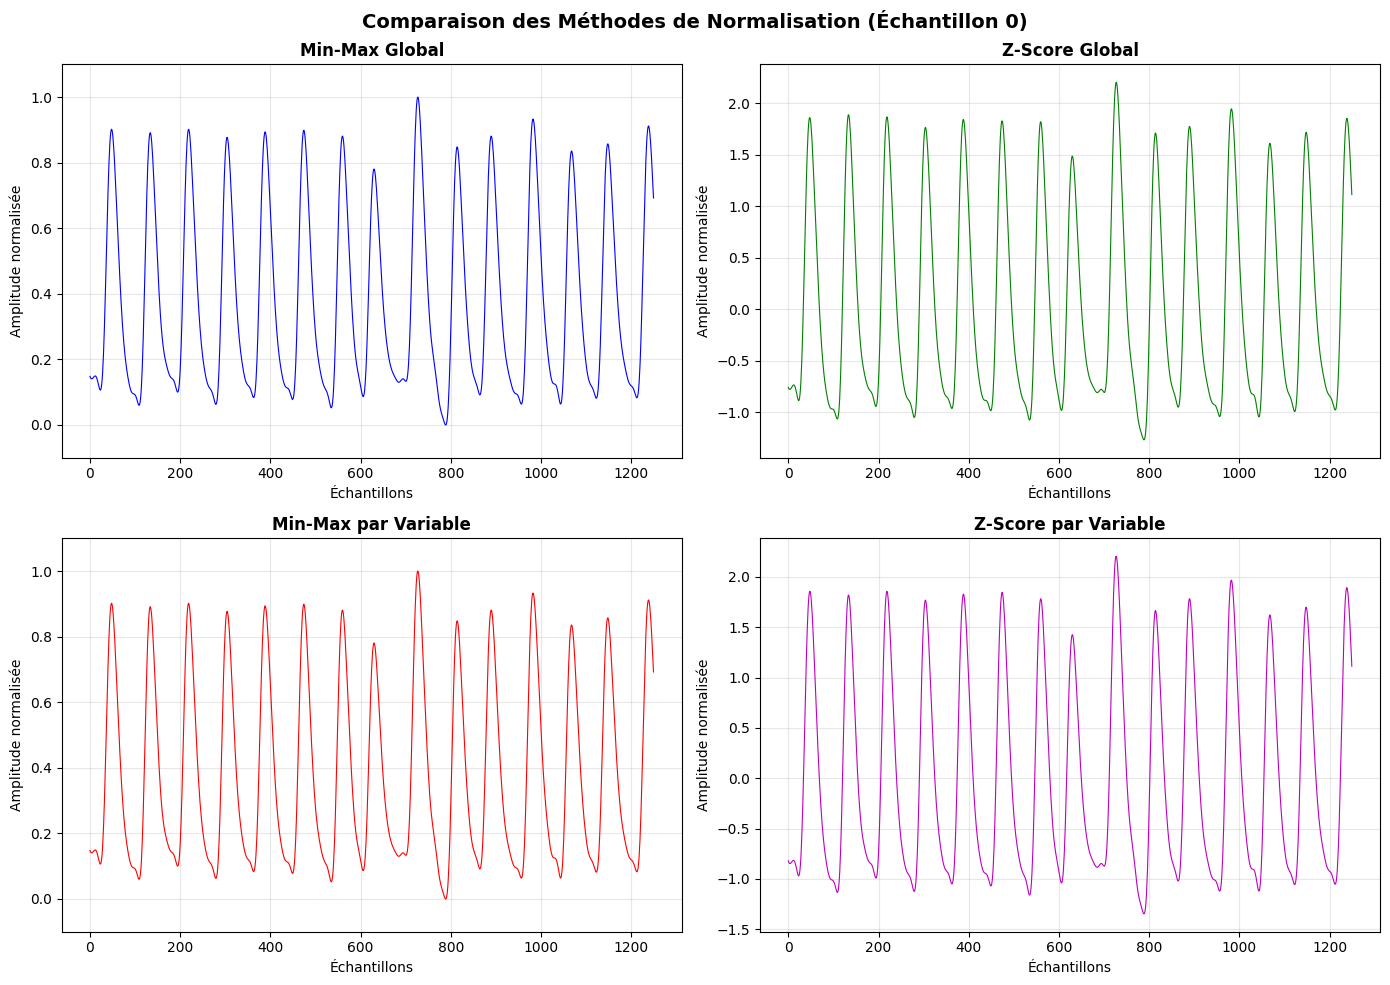

In [103]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sample_idx = 0

# 1. Min-Max Global
axes[0, 0].plot(train_minmax_global[sample_idx], 'b-', linewidth=0.8)
axes[0, 0].set_title('Min-Max Global', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Échantillons')
axes[0, 0].set_ylabel('Amplitude normalisée')
axes[0, 0].set_ylim([-0.1, 1.1])
axes[0, 0].grid(True, alpha=0.3)

# 2. Z-Score Global
axes[0, 1].plot(train_zscore_global[sample_idx], 'g-', linewidth=0.8)
axes[0, 1].set_title('Z-Score Global', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Échantillons')
axes[0, 1].set_ylabel('Amplitude normalisée')
axes[0, 1].grid(True, alpha=0.3)

# 3. Min-Max par variable
axes[1, 0].plot(train_minmax_per_var[sample_idx], 'r-', linewidth=0.8)
axes[1, 0].set_title('Min-Max par Variable', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Échantillons')
axes[1, 0].set_ylabel('Amplitude normalisée')
axes[1, 0].set_ylim([-0.1, 1.1])
axes[1, 0].grid(True, alpha=0.3)

# 4. Z-Score par variable
axes[1, 1].plot(train_zscore_per_var[sample_idx], 'm-', linewidth=0.8)
axes[1, 1].set_title('Z-Score par Variable', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Échantillons')
axes[1, 1].set_ylabel('Amplitude normalisée')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Comparaison des Méthodes de Normalisation (Échantillon 0)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('images/ex6_normalization_comparison_sample.png', dpi=150, bbox_inches='tight')
plt.show()

L'analyse visuelle des signaux normalisés montre les différences d'échelle et de distribution. Comme attendu, la normalisation Min-Max globale maintient le signal dans l'intervalle [0,1] avec une préservation fidèle de la morphologie originale tandis qye le Z-Score global centre le signal autour de zéro avec une variance unitaire, créant une représentation où les pics systoliques atteignent typiquement +2 écarts-types.

De l'autre coté, les normalisations par variable montrent des amplitudes similaires mais avec une variabilité point par point qui suggère une adaptation locale. En effet, cette caractéristique pourrait expliquer pourquoi le Z-Score par variable performe légèrement mieux pour la SBP (voir "Tableau de comparaison" ci-dessous), car il pourrait capturer des variations temporelles fines qui sont importantes pour l'estimation de la pression systolique.

## Entraînement et évaluation avec chaque normalisation

Maintenant il faut entraîner le modèle CNN-LSTM-MLP de base avec chaque type de normalisation et comparer les performances finalement

In [ ]:
# Fonction pour entraîner et évaluer un modèle avec une normalisation donnée
def train_and_evaluate_normalization(train_X, test_X, train_y, test_y, norm_name, label_scaler, epochs=50):
    """
    Entraîne un modèle CNN-LSTM-MLP et retourne les métriques
    """
    print(f"\n{'='*60}")
    print(f"Entraînement avec {norm_name}")
    print(f"{'='*60}")
    
    # Construction du modèle
    tf.keras.backend.clear_session()
    input_shape = (train_X.shape[1], train_X.shape[2])
    model = build_cnn_lstm_mlp(input_shape)
    
    # Compilation du modèle
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    # Callbacks
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    
    # Entraînement
    history = model.fit(
        train_X, train_y,
        epochs=epochs,
        batch_size=64,
        validation_split=0.15,
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )
    
    print(f"Entraînement terminé en {len(history.history['loss'])} époques")
    
    
    predictions_norm = model.predict(test_X, verbose=0)
    predictions = label_scaler.inverse_transform(predictions_norm)
    true_values = label_scaler.inverse_transform(test_y)
    
    
    sbp_pred = predictions[:, 0]
    dbp_pred = predictions[:, 1]
    sbp_true = true_values[:, 0]
    dbp_true = true_values[:, 1]
    
    # Erreurs
    sbp_errors = sbp_pred - sbp_true
    dbp_errors = dbp_pred - dbp_true
    
    # Métriques
    results = {
        'SBP_ME': np.mean(sbp_errors),
        'SBP_MAE': np.mean(np.abs(sbp_errors)),
        'SBP_SDE': np.std(sbp_errors),
        'DBP_ME': np.mean(dbp_errors),
        'DBP_MAE': np.mean(np.abs(dbp_errors)),
        'DBP_SDE': np.std(dbp_errors),
        'history': history,
        'predictions': predictions,
        'true_values': true_values
    }
    
    print(f"\nRésultats pour {norm_name}:")
    print(f"  SBP - ME: {results['SBP_ME']:.2f} mmHg, MAE: {results['SBP_MAE']:.2f} mmHg, SDE: {results['SBP_SDE']:.2f} mmHg")
    print(f"  DBP - ME: {results['DBP_ME']:.2f} mmHg, MAE: {results['DBP_MAE']:.2f} mmHg, SDE: {results['DBP_SDE']:.2f} mmHg")
    
    return results


### Préparation des données

Pour faciliter la partie d'analyse, la totalite des resultats sont sauvegardé sur une structure de dictionaire. 

In [108]:
normalization_results = {}


normalizations = {
    'Min-Max Global': (train_minmax_global, test_minmax_global),
    'Z-Score Global': (train_zscore_global, test_zscore_global),
    'Min-Max par Variable': (train_minmax_per_var, test_minmax_per_var),
    'Z-Score par Variable': (train_zscore_per_var, test_zscore_per_var)
}

print("Configurations de normalisation préparées:")
for name, (train_data, test_data) in normalizations.items():
    print(f"{name}: Train shape = {train_data.shape}, Test shape = {test_data.shape}")

Configurations de normalisation préparées:
Min-Max Global: Train shape = (5000, 1250), Test shape = (500, 1250)
Z-Score Global: Train shape = (5000, 1250), Test shape = (500, 1250)
Min-Max par Variable: Train shape = (5000, 1250), Test shape = (500, 1250)
Z-Score par Variable: Train shape = (5000, 1250), Test shape = (500, 1250)


In [109]:
# 1. Entraînement avec Min-Max Global
train_X = normalizations['Min-Max Global'][0]
test_X = normalizations['Min-Max Global'][1]

# Ajouter la dimension pour le modèle (n_samples, timesteps, 1)
if train_X.ndim == 2:
    train_X = np.expand_dims(train_X, axis=-1)
    test_X = np.expand_dims(test_X, axis=-1)

print(f"Shape train_X: {train_X.shape}, test_X: {test_X.shape}")

normalization_results['Min-Max Global'] = train_and_evaluate_normalization(
    train_X, test_X, train_labels_norm, test_labels_norm, 
    'Min-Max Global', label_scaler_ex6, epochs=50
)

Shape train_X: (5000, 1250, 1), test_X: (500, 1250, 1)

Entraînement avec Min-Max Global

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 3.

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 3.
Entraînement terminé en 18 époques
Entraînement terminé en 18 époques

Résultats pour Min-Max Global:
  SBP - ME: -8.16 mmHg, MAE: 17.19 mmHg, SDE: 21.15 mmHg
  DBP - ME: 0.02 mmHg, MAE: 10.05 mmHg, SDE: 13.26 mmHg

Résultats pour Min-Max Global:
  SBP - ME: -8.16 mmHg, MAE: 1

In [110]:
# 2. Entraînement avec Z-Score Global
train_X = normalizations['Z-Score Global'][0]
test_X = normalizations['Z-Score Global'][1]

# Ajouter la dimension pour le modèle (n_samples, timesteps, 1)
if train_X.ndim == 2:
    train_X = np.expand_dims(train_X, axis=-1)
    test_X = np.expand_dims(test_X, axis=-1)

print(f"Shape train_X: {train_X.shape}, test_X: {test_X.shape}")

normalization_results['Z-Score Global'] = train_and_evaluate_normalization(
    train_X, test_X, train_labels_norm, test_labels_norm, 
    'Z-Score Global', label_scaler_ex6, epochs=50
)

Shape train_X: (5000, 1250, 1), test_X: (500, 1250, 1)

Entraînement avec Z-Score Global

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 22: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 7.

Epoch 22: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 7.
Entraînement terminé en 22 époques
Entraînement terminé en 22 époques

Résultats pour Z-Score Global:
  SBP - ME: -1.96 mmH

In [111]:
# 3. Entraînement avec Min-Max par Variable
train_X = normalizations['Min-Max par Variable'][0]
test_X = normalizations['Min-Max par Variable'][1]

# Ajouter la dimension pour le modèle (n_samples, timesteps, 1)
if train_X.ndim == 2:
    train_X = np.expand_dims(train_X, axis=-1)
    test_X = np.expand_dims(test_X, axis=-1)

print(f"Shape train_X: {train_X.shape}, test_X: {test_X.shape}")

normalization_results['Min-Max par Variable'] = train_and_evaluate_normalization(
    train_X, test_X, train_labels_norm, test_labels_norm, 
    'Min-Max par Variable', label_scaler_ex6, epochs=50
)

Shape train_X: (5000, 1250, 1), test_X: (500, 1250, 1)

Entraînement avec Min-Max par Variable

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 8.

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 8.
Entraînement terminé en 23 époques
Entraînement terminé en 23 époques

Résultats pour Min-Max par Variable:
  SBP - ME: -1.95 mmHg, MAE: 16.81 mmHg, SDE: 21.72 mmHg
  DBP - ME: 2.03 mmHg, MAE: 10.55 mmHg, SDE: 13.57 mmHg

Résultats pour Min-Max par Variable:
  SBP - ME

In [112]:
# 4. Entraînement avec Z-Score par Variable
train_X = normalizations['Z-Score par Variable'][0]
test_X = normalizations['Z-Score par Variable'][1]

# Ajouter la dimension pour le modèle (n_samples, timesteps, 1)
if train_X.ndim == 2:
    train_X = np.expand_dims(train_X, axis=-1)
    test_X = np.expand_dims(test_X, axis=-1)

print(f"Shape train_X: {train_X.shape}, test_X: {test_X.shape}")

normalization_results['Z-Score par Variable'] = train_and_evaluate_normalization(
    train_X, test_X, train_labels_norm, test_labels_norm, 
    'Z-Score par Variable', label_scaler_ex6, epochs=50
)

Shape train_X: (5000, 1250, 1), test_X: (500, 1250, 1)

Entraînement avec Z-Score par Variable

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 1.

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 1.
Entraînement terminé en 16 époques
Entraînement terminé en 16 époques

Résultats pour Z-Score par Variable:
  SBP - ME: -3.58 mmHg, MAE: 16.79 mmHg, SDE: 21.52 mmHg
  DBP - ME: 0.54 mmHg, MAE: 10.17 mmHg, SDE: 13.35 mmHg

Résultats pour Z-Score par Variable:
  SBP - ME: 

### Tableau de comparaison

In [118]:
comparison_data = []

for norm_name, results in normalization_results.items():
    comparison_data.append({
        'Normalisation': norm_name,
        'SBP ME (mmHg)': f"{results['SBP_ME']:.2f}",
        'SBP MAE (mmHg)': f"{results['SBP_MAE']:.2f}",
        'SBP SDE (mmHg)': f"{results['SBP_SDE']:.2f}",
        'DBP ME (mmHg)': f"{results['DBP_ME']:.2f}",
        'DBP MAE (mmHg)': f"{results['DBP_MAE']:.2f}",
        'DBP SDE (mmHg)': f"{results['DBP_SDE']:.2f}"
    })

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))


# la meilleur emethode 
best_sbp_mae = min(comparison_data, key=lambda x: float(x['SBP MAE (mmHg)']))
best_dbp_mae = min(comparison_data, key=lambda x: float(x['DBP MAE (mmHg)']))

print(f"\nMeilleure méthode pour SBP (MAE): {best_sbp_mae['Normalisation']} ({best_sbp_mae['SBP MAE (mmHg)']} mmHg)")
print(f"Meilleure méthode pour DBP (MAE): {best_dbp_mae['Normalisation']} ({best_dbp_mae['DBP MAE (mmHg)']} mmHg)")

       Normalisation SBP ME (mmHg) SBP MAE (mmHg) SBP SDE (mmHg) DBP ME (mmHg) DBP MAE (mmHg) DBP SDE (mmHg)
      Min-Max Global         -8.16          17.19          21.15          0.02          10.05          13.26
      Z-Score Global         -1.96          16.89          21.69         -1.54          10.21          13.31
Min-Max par Variable         -1.95          16.81          21.72          2.03          10.55          13.57
Z-Score par Variable         -3.58          16.79          21.52          0.54          10.17          13.35

Meilleure méthode pour SBP (MAE): Z-Score par Variable (16.79 mmHg)
Meilleure méthode pour DBP (MAE): Min-Max Global (10.05 mmHg)


Pour trouver les meilleures méthodes pour SBP et DBP, on fait une analyse très simple. On regarde pour MAE le minimum des données de comparaison basé sur les métriques de base ME, MAE, et SDE.

L'analyse du tableau révèle des petites différences mais importantes entre les quatre méthodes de normalisation testées. La Min-Max globale, notre méthode de base, présente une SBP MAE de 17.19 mmHg avec un biais notable de -8.16 mmHg, ce qui suggère une tendance systématique à la sous-estimation. Au contraire, la normalisation Z-Score par variable offre la meilleure performance pour la SBP avec une MAE de 16.79 mmHg, tandis que la Min-Max globale reste optimale pour la DBP avec 10.05 mmHg.

### Visualisation des performances

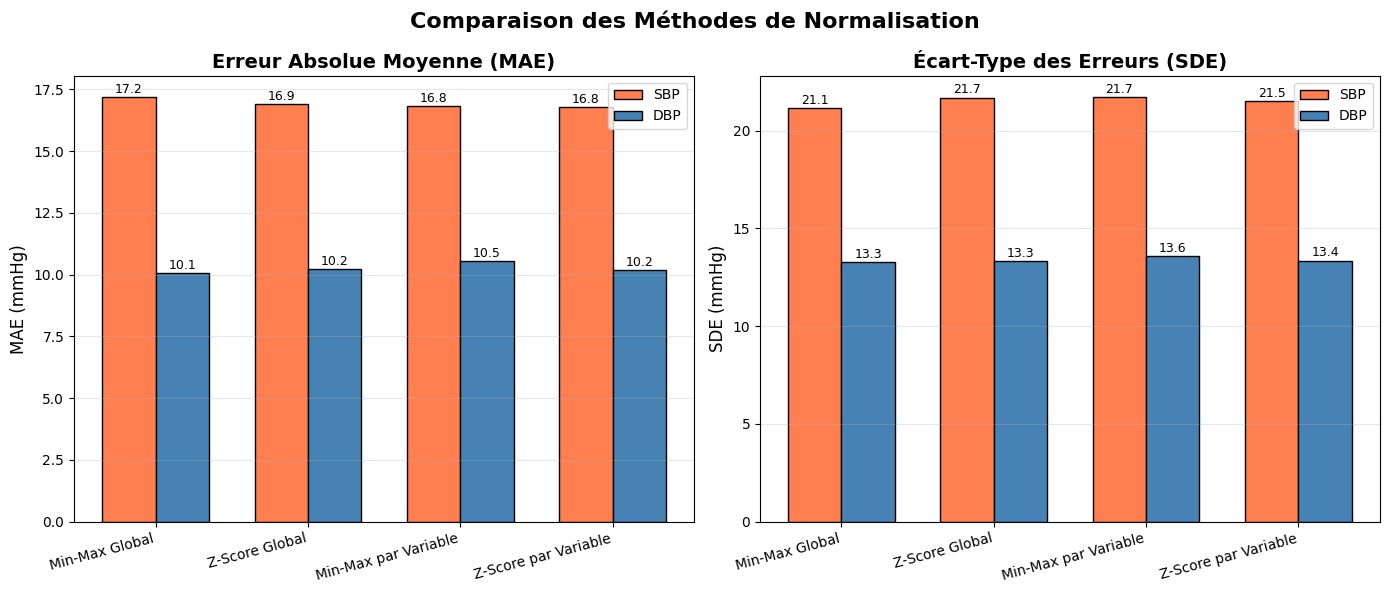

In [119]:
# Graphique comparatif MAE et SDE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

norm_names = list(normalization_results.keys())
x = np.arange(len(norm_names))
width = 0.35

# MAE
sbp_mae = [normalization_results[n]['SBP_MAE'] for n in norm_names]
dbp_mae = [normalization_results[n]['DBP_MAE'] for n in norm_names]

bars1 = axes[0].bar(x - width/2, sbp_mae, width, label='SBP', color='coral', edgecolor='black')
bars2 = axes[0].bar(x + width/2, dbp_mae, width, label='DBP', color='steelblue', edgecolor='black')

axes[0].set_ylabel('MAE (mmHg)', fontsize=12)
axes[0].set_title('Erreur Absolue Moyenne (MAE)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(norm_names, rotation=15, ha='right')
axes[0].legend()
axes[0].grid(True, axis='y', alpha=0.3)

# Ajouter valeurs sur les barres
for bar in bars1:
    axes[0].annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)
for bar in bars2:
    axes[0].annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# SDE
sbp_sde = [normalization_results[n]['SBP_SDE'] for n in norm_names]
dbp_sde = [normalization_results[n]['DBP_SDE'] for n in norm_names]

bars3 = axes[1].bar(x - width/2, sbp_sde, width, label='SBP', color='coral', edgecolor='black')
bars4 = axes[1].bar(x + width/2, dbp_sde, width, label='DBP', color='steelblue', edgecolor='black')

axes[1].set_ylabel('SDE (mmHg)', fontsize=12)
axes[1].set_title('Écart-Type des Erreurs (SDE)', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(norm_names, rotation=15, ha='right')
axes[1].legend()
axes[1].grid(True, axis='y', alpha=0.3)

# Ajouter valeurs sur les barres
for bar in bars3:
    axes[1].annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)
for bar in bars4:
    axes[1].annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

plt.suptitle('Comparaison des Méthodes de Normalisation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('images/ex6_normalization_mae_sde.png', dpi=150, bbox_inches='tight')
plt.show()

Ici on peut voir une stabilité des performances à travers les différentes méthodes, avec des variations de MAE inférieures à 0.5 mmHg. Cette consistance évoque que l'architecture CNN-LSTM-MLP est robuste aux variations de stratégie de normalisation, ce qui constitue une qualité importante pour le déploiement pratique du système en général.

### Graphes de Bland-Altman

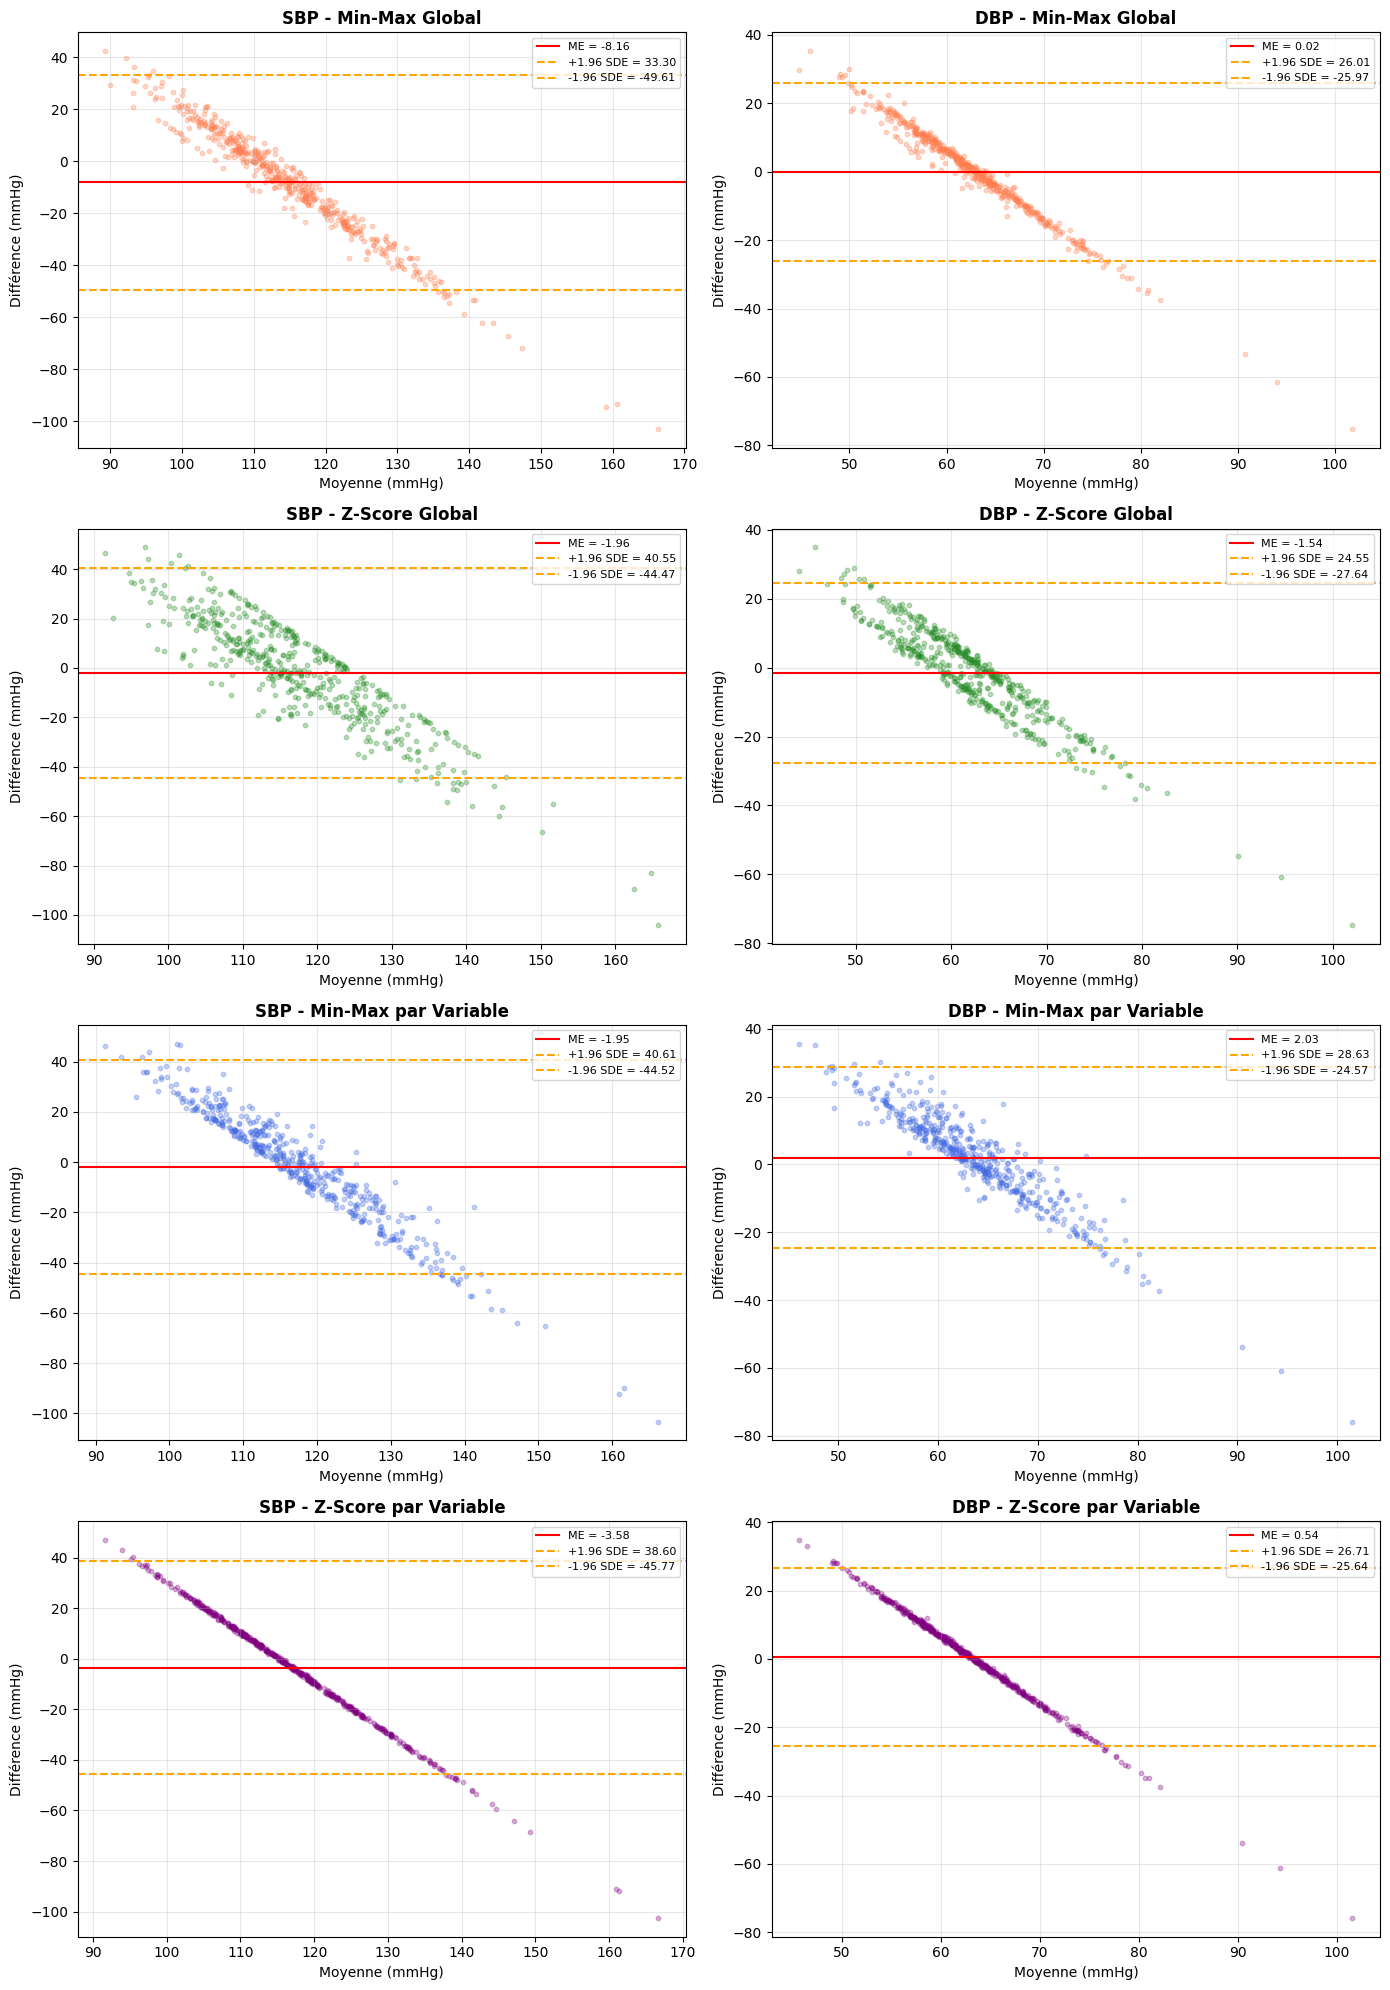

In [122]:
fig, axes = plt.subplots(4, 2, figsize=(14, 20))

colors = ['coral', 'forestgreen', 'royalblue', 'purple']

for idx, (norm_name, results) in enumerate(normalization_results.items()):
    predictions = results['predictions']
    true_values = results['true_values']
    
    # SBP Bland-Altman
    sbp_mean = (predictions[:, 0] + true_values[:, 0]) / 2
    sbp_diff = predictions[:, 0] - true_values[:, 0]
    sbp_mean_diff = np.mean(sbp_diff)
    sbp_std_diff = np.std(sbp_diff)
    
    axes[idx, 0].scatter(sbp_mean, sbp_diff, alpha=0.3, s=10, c=colors[idx])
    axes[idx, 0].axhline(y=sbp_mean_diff, color='red', linestyle='-', label=f'ME = {sbp_mean_diff:.2f}')
    axes[idx, 0].axhline(y=sbp_mean_diff + 1.96*sbp_std_diff, color='orange', linestyle='--', label=f'+1.96 SDE = {sbp_mean_diff + 1.96*sbp_std_diff:.2f}')
    axes[idx, 0].axhline(y=sbp_mean_diff - 1.96*sbp_std_diff, color='orange', linestyle='--', label=f'-1.96 SDE = {sbp_mean_diff - 1.96*sbp_std_diff:.2f}')
    axes[idx, 0].set_xlabel('Moyenne (mmHg)')
    axes[idx, 0].set_ylabel('Différence (mmHg)')
    axes[idx, 0].set_title(f'SBP - {norm_name}', fontweight='bold')
    axes[idx, 0].legend(fontsize=8, loc='upper right')
    axes[idx, 0].grid(True, alpha=0.3)
    
    # DBP Bland-Altman
    dbp_mean = (predictions[:, 1] + true_values[:, 1]) / 2
    dbp_diff = predictions[:, 1] - true_values[:, 1]
    dbp_mean_diff = np.mean(dbp_diff)
    dbp_std_diff = np.std(dbp_diff)
    
    axes[idx, 1].scatter(dbp_mean, dbp_diff, alpha=0.3, s=10, c=colors[idx])
    axes[idx, 1].axhline(y=dbp_mean_diff, color='red', linestyle='-', label=f'ME = {dbp_mean_diff:.2f}')
    axes[idx, 1].axhline(y=dbp_mean_diff + 1.96*dbp_std_diff, color='orange', linestyle='--', label=f'+1.96 SDE = {dbp_mean_diff + 1.96*dbp_std_diff:.2f}')
    axes[idx, 1].axhline(y=dbp_mean_diff - 1.96*dbp_std_diff, color='orange', linestyle='--', label=f'-1.96 SDE = {dbp_mean_diff - 1.96*dbp_std_diff:.2f}')
    axes[idx, 1].set_xlabel('Moyenne (mmHg)')
    axes[idx, 1].set_ylabel('Différence (mmHg)')
    axes[idx, 1].set_title(f'DBP - {norm_name}', fontweight='bold')
    axes[idx, 1].legend(fontsize=8, loc='upper right')
    axes[idx, 1].grid(True, alpha=0.3)

# plt.suptitle('Diagrammes de Bland-Altman - Comparaison des Normalisations', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('images/ex6_bland_altman_normalizations.png', dpi=150, bbox_inches='tight')
plt.show()

Pour la méthode de normalisation Min-Max globale on observe une dispersion relativement uniforme des points avec des limites d'accord à ±49.61 mmHg pour la SBP. La normalisation Z-Score globale présente une dispersion légèrement plus large avec des limites à ±44.47 mmHg, mais avec un biais réduit de -1.96 mmHg contre -8.16 mmHg pour Min-Max.

Ce qui est intéressant apparaît dans les normalisations par variable où les points forment des patterns beaucoup plus structurés, notamment visible dans le Z-Score par variable qui montre une distribution plus linéaire. Cette organisation montre probablement que la normalisation par variable préserve mieux les relations intrinsèques du signal PPG tout en permettant au modèle d'apprendre des représentations plus cohérentes.

### Les courbes d'apprentissage

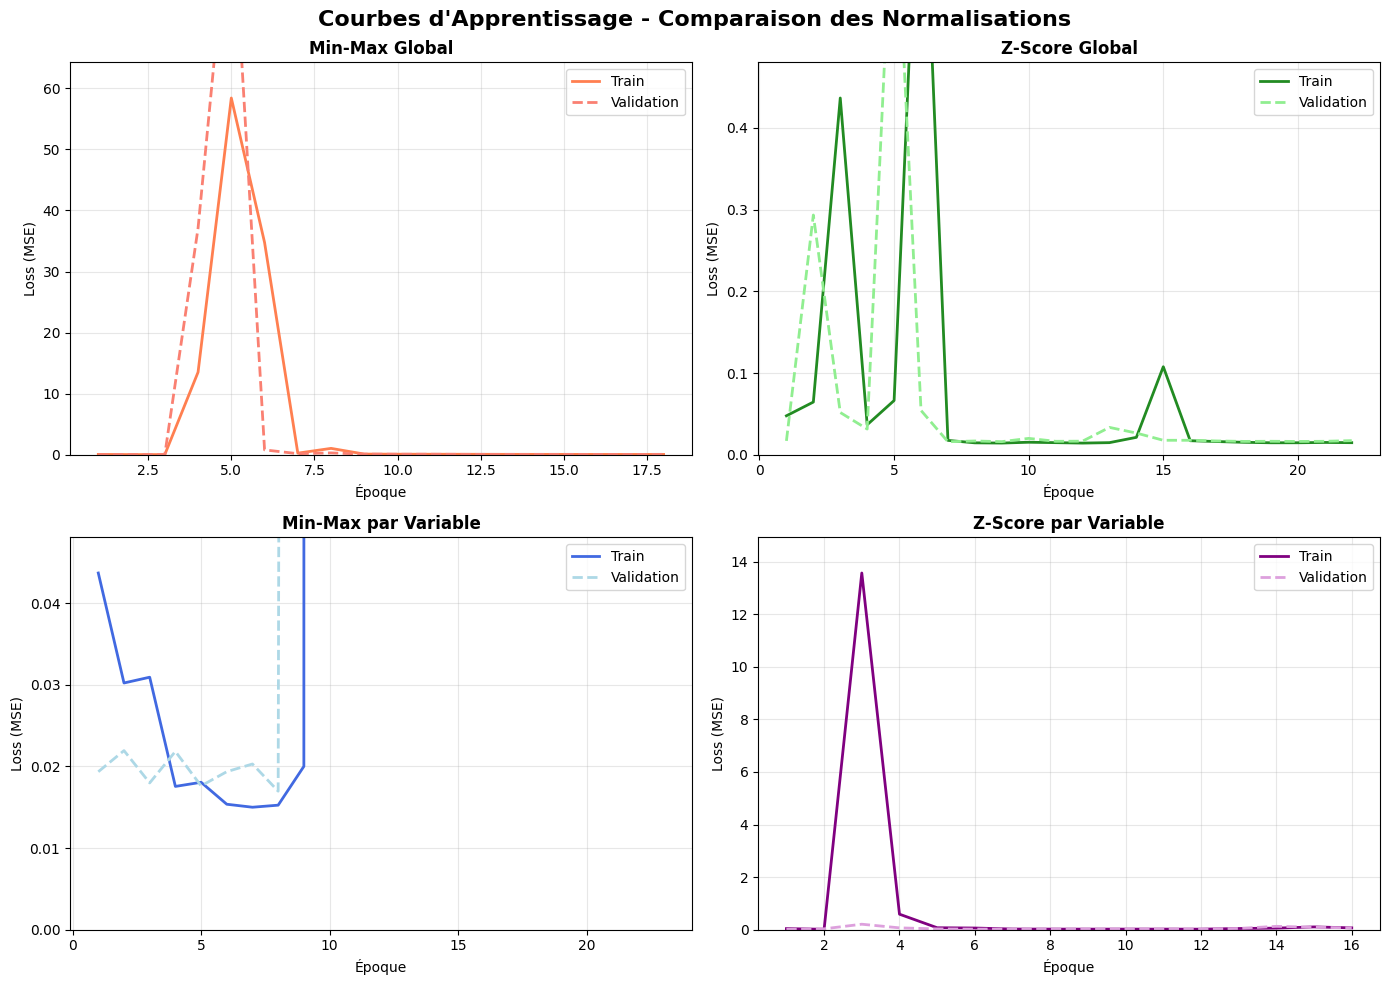

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

colors_train = ['coral', 'forestgreen', 'royalblue', 'purple']
colors_val = ['salmon', 'lightgreen', 'lightblue', 'plum']

for idx, (norm_name, results) in enumerate(normalization_results.items()):
    history = results['history']
    epochs = range(1, len(history.history['loss']) + 1)
    
    axes[idx].plot(epochs, history.history['loss'], color=colors_train[idx], label='Train', linewidth=2)
    axes[idx].plot(epochs, history.history['val_loss'], color=colors_val[idx], linestyle='--', label='Validation', linewidth=2)
    axes[idx].set_xlabel('Époque')
    axes[idx].set_ylabel('Loss (MSE)')
    axes[idx].set_title(f'{norm_name}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim([0, max(history.history['loss'][:5]) * 1.1])  # Zoom sur les valeurs pertinentes

plt.suptitle('Courbes d\'Apprentissage - Comparaison des Normalisations', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('images/ex6_learning_curves_normalizations.png', dpi=150, bbox_inches='tight')
plt.show()

Pour finir, ici nous avons les courbes d'entraînement pour les 4 methodes d'entrainement. Les courbes d'apprentissage montrent que la Min-Max globale présente une instabilité initiale importante avec un pic de loss à 60 avant sa stabilisation à l'époque 6. Le Z-Score global converge plus progressivement avec des oscillations modérées aux époques 2-3, 6 et 15. La Min-Max par variable offre la convergence la plus stable en atteignant son minimum à l'époque 8 avec une décroissance monotone. Au contraire, le Z-Score par variable montre le comportement le plus instable avec un pic de loss proche à 14 à l'époque 3 avant une chute rapide comme la methode Min-Max globale.